In [1]:
#Import of Basic Libraries
#Basic Libraries
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import io
sb.set()

In [6]:
movieDB = pd.read_csv('CleanedNomData.csv')
movieDB = pd.DataFrame(movieDB[['id','title','budget','revenue','vote_average','runtime','top_casts_popularity_avg','casts_popularity_sum','top_cast_popularity','top_crews_popularity_avg','crews_popularity_sum','top_crew_popularity','percentage_revenue','Won']])

movieDB.head()

id             title     budget    revenue  vote_average  runtime  \
0  113167         The Noose        NaN        NaN          6.70     65.0   
1   43197  The Last Command        NaN        NaN          6.40    110.0   
2  104212   A Ship Comes In        NaN        NaN          5.50     70.0   
3   82474        7th Heaven      119.0        NaN          7.37    110.0   
4   42538    Sadie Thompson  1000000.0  7000000.0          6.80     97.0   

   top_casts_popularity_avg  casts_popularity_sum  top_cast_popularity  \
0                  1.582286                15.598                2.260   
1                 11.207714               109.128               21.641   
2                  1.531000                11.317                4.116   
3                  2.758571                25.023                8.574   
4                  2.442286                18.896                6.750   

   top_crews_popularity_avg  crews_popularity_sum  top_crew_popularity  \
0                  0.722000                 5.654                0.980   
1                  1.352143                15.417                2.167   
2                  1.016571                 7.716                1.380   
3                  1.284000                20.293                2.268   
4                  1.789000                13.723                2.301   

   percentage_revenue  Won  
0              340.11  1.0  
1              340.11  1.0  
2              340.11  1.0  
3              340.11  1.0  
4              700.00  1.0

## Explore the dataset
We want to explore the data set to see what kind of variables have a large correlation to the movie winning an oscar

In [7]:
print(movieDB.dtypes)

id                            int64
title                        object
budget                      float64
revenue                     float64
vote_average                float64
runtime                     float64
top_casts_popularity_avg    float64
casts_popularity_sum        float64
top_cast_popularity         float64
top_crews_popularity_avg    float64
crews_popularity_sum        float64
top_crew_popularity         float64
percentage_revenue          float64
Won                         float64
dtype: object


<AxesSubplot:xlabel='percentage_revenue', ylabel='Won'>

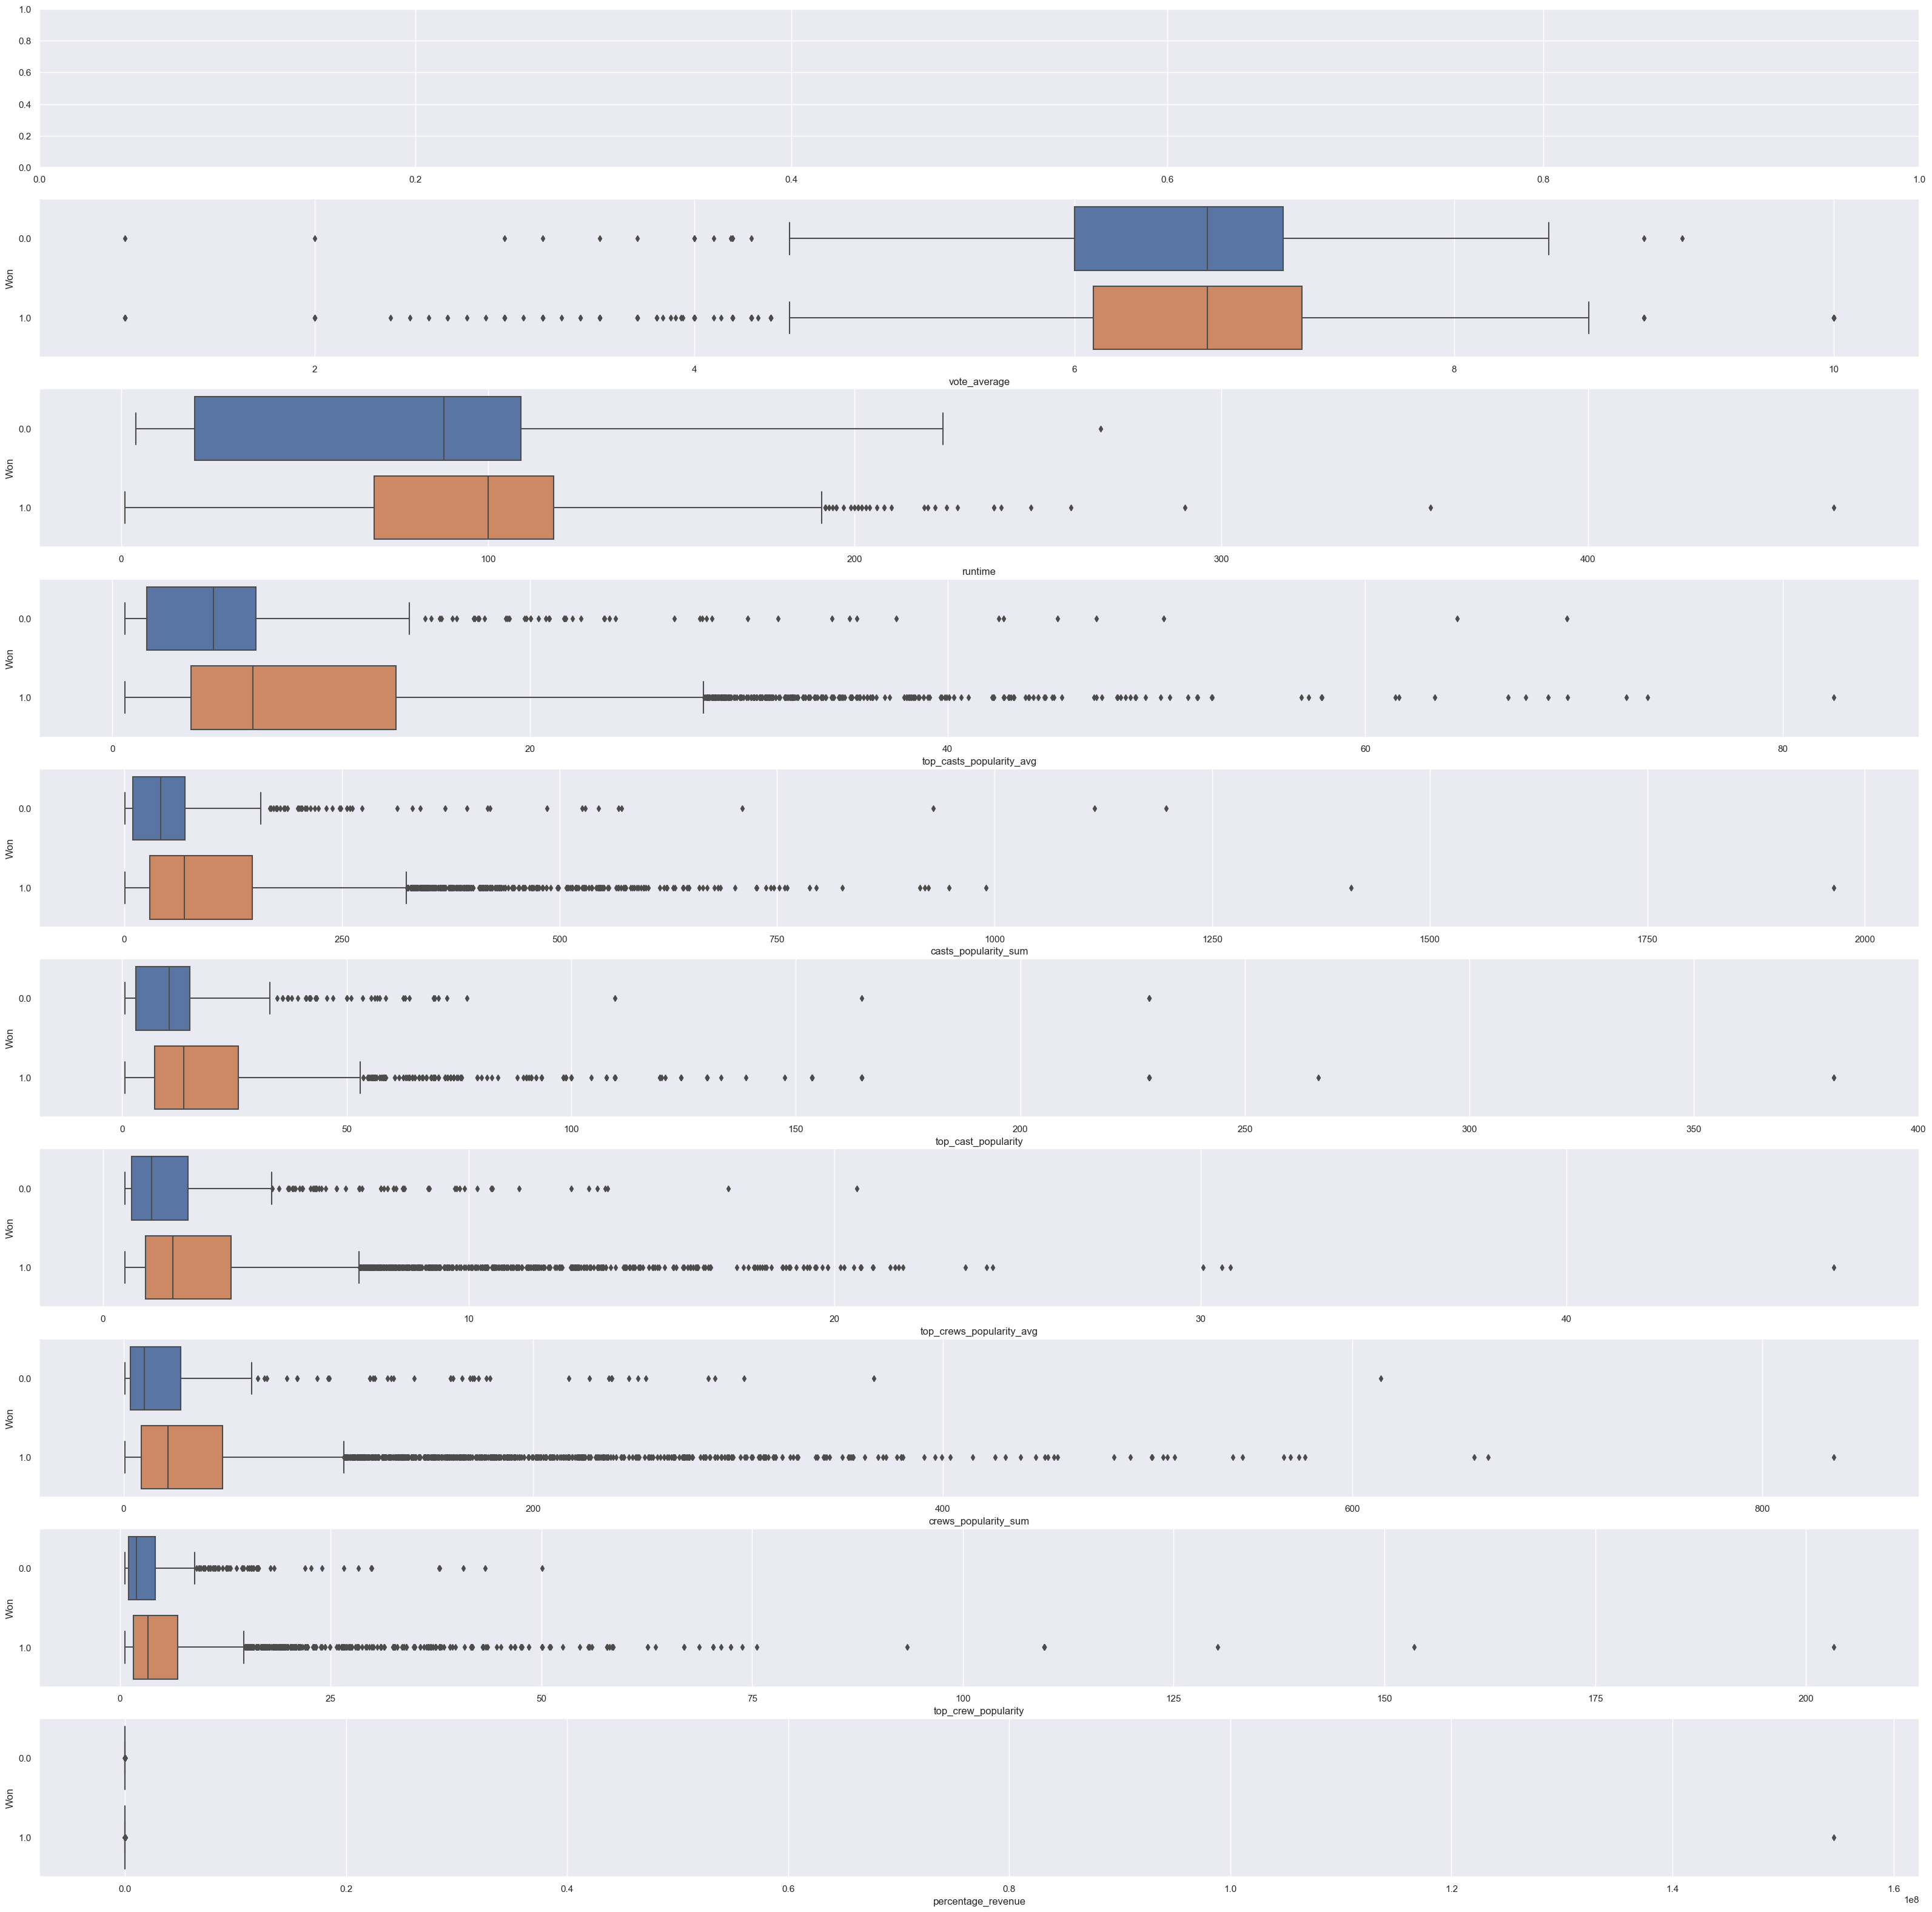

In [11]:
f,axes = plt.subplots(10,1,figsize=(40,40))
# sb.boxplot(x='release_date',y='Won',data=movieDB[['release_date','Won']],ax=axes[0],orient='h')
# sb.boxplot(x='popularity.1',y='Won',data=movieDB[['popularity.1','Won']],ax=axes[1],orient='h')
sb.boxplot(x='vote_average',y='Won',data=movieDB[['vote_average','Won']],ax=axes[1],orient='h')
sb.boxplot(x='runtime',y='Won',data=movieDB[['runtime','Won']],ax=axes[2],orient='h')
sb.boxplot(x='top_casts_popularity_avg',y='Won',data=movieDB[['top_casts_popularity_avg','Won']],ax=axes[3],orient='h')
sb.boxplot(x='casts_popularity_sum',y='Won',data=movieDB[['casts_popularity_sum','Won']],ax=axes[4],orient='h')
sb.boxplot(x='top_cast_popularity',y='Won',data=movieDB[['top_cast_popularity','Won']],ax=axes[5],orient='h')
sb.boxplot(x='top_crews_popularity_avg',y='Won',data=movieDB[['top_crews_popularity_avg','Won']],ax=axes[6],orient='h')
sb.boxplot(x='crews_popularity_sum',y='Won',data=movieDB[['crews_popularity_sum','Won']],ax=axes[7],orient='h')
sb.boxplot(x='top_crew_popularity',y='Won',data=movieDB[['top_crew_popularity','Won']],ax=axes[8],orient='h')
sb.boxplot(x='percentage_revenue',y='Won',data=movieDB[['percentage_revenue','Won']],ax=axes[9],orient='h')

<AxesSubplot:>

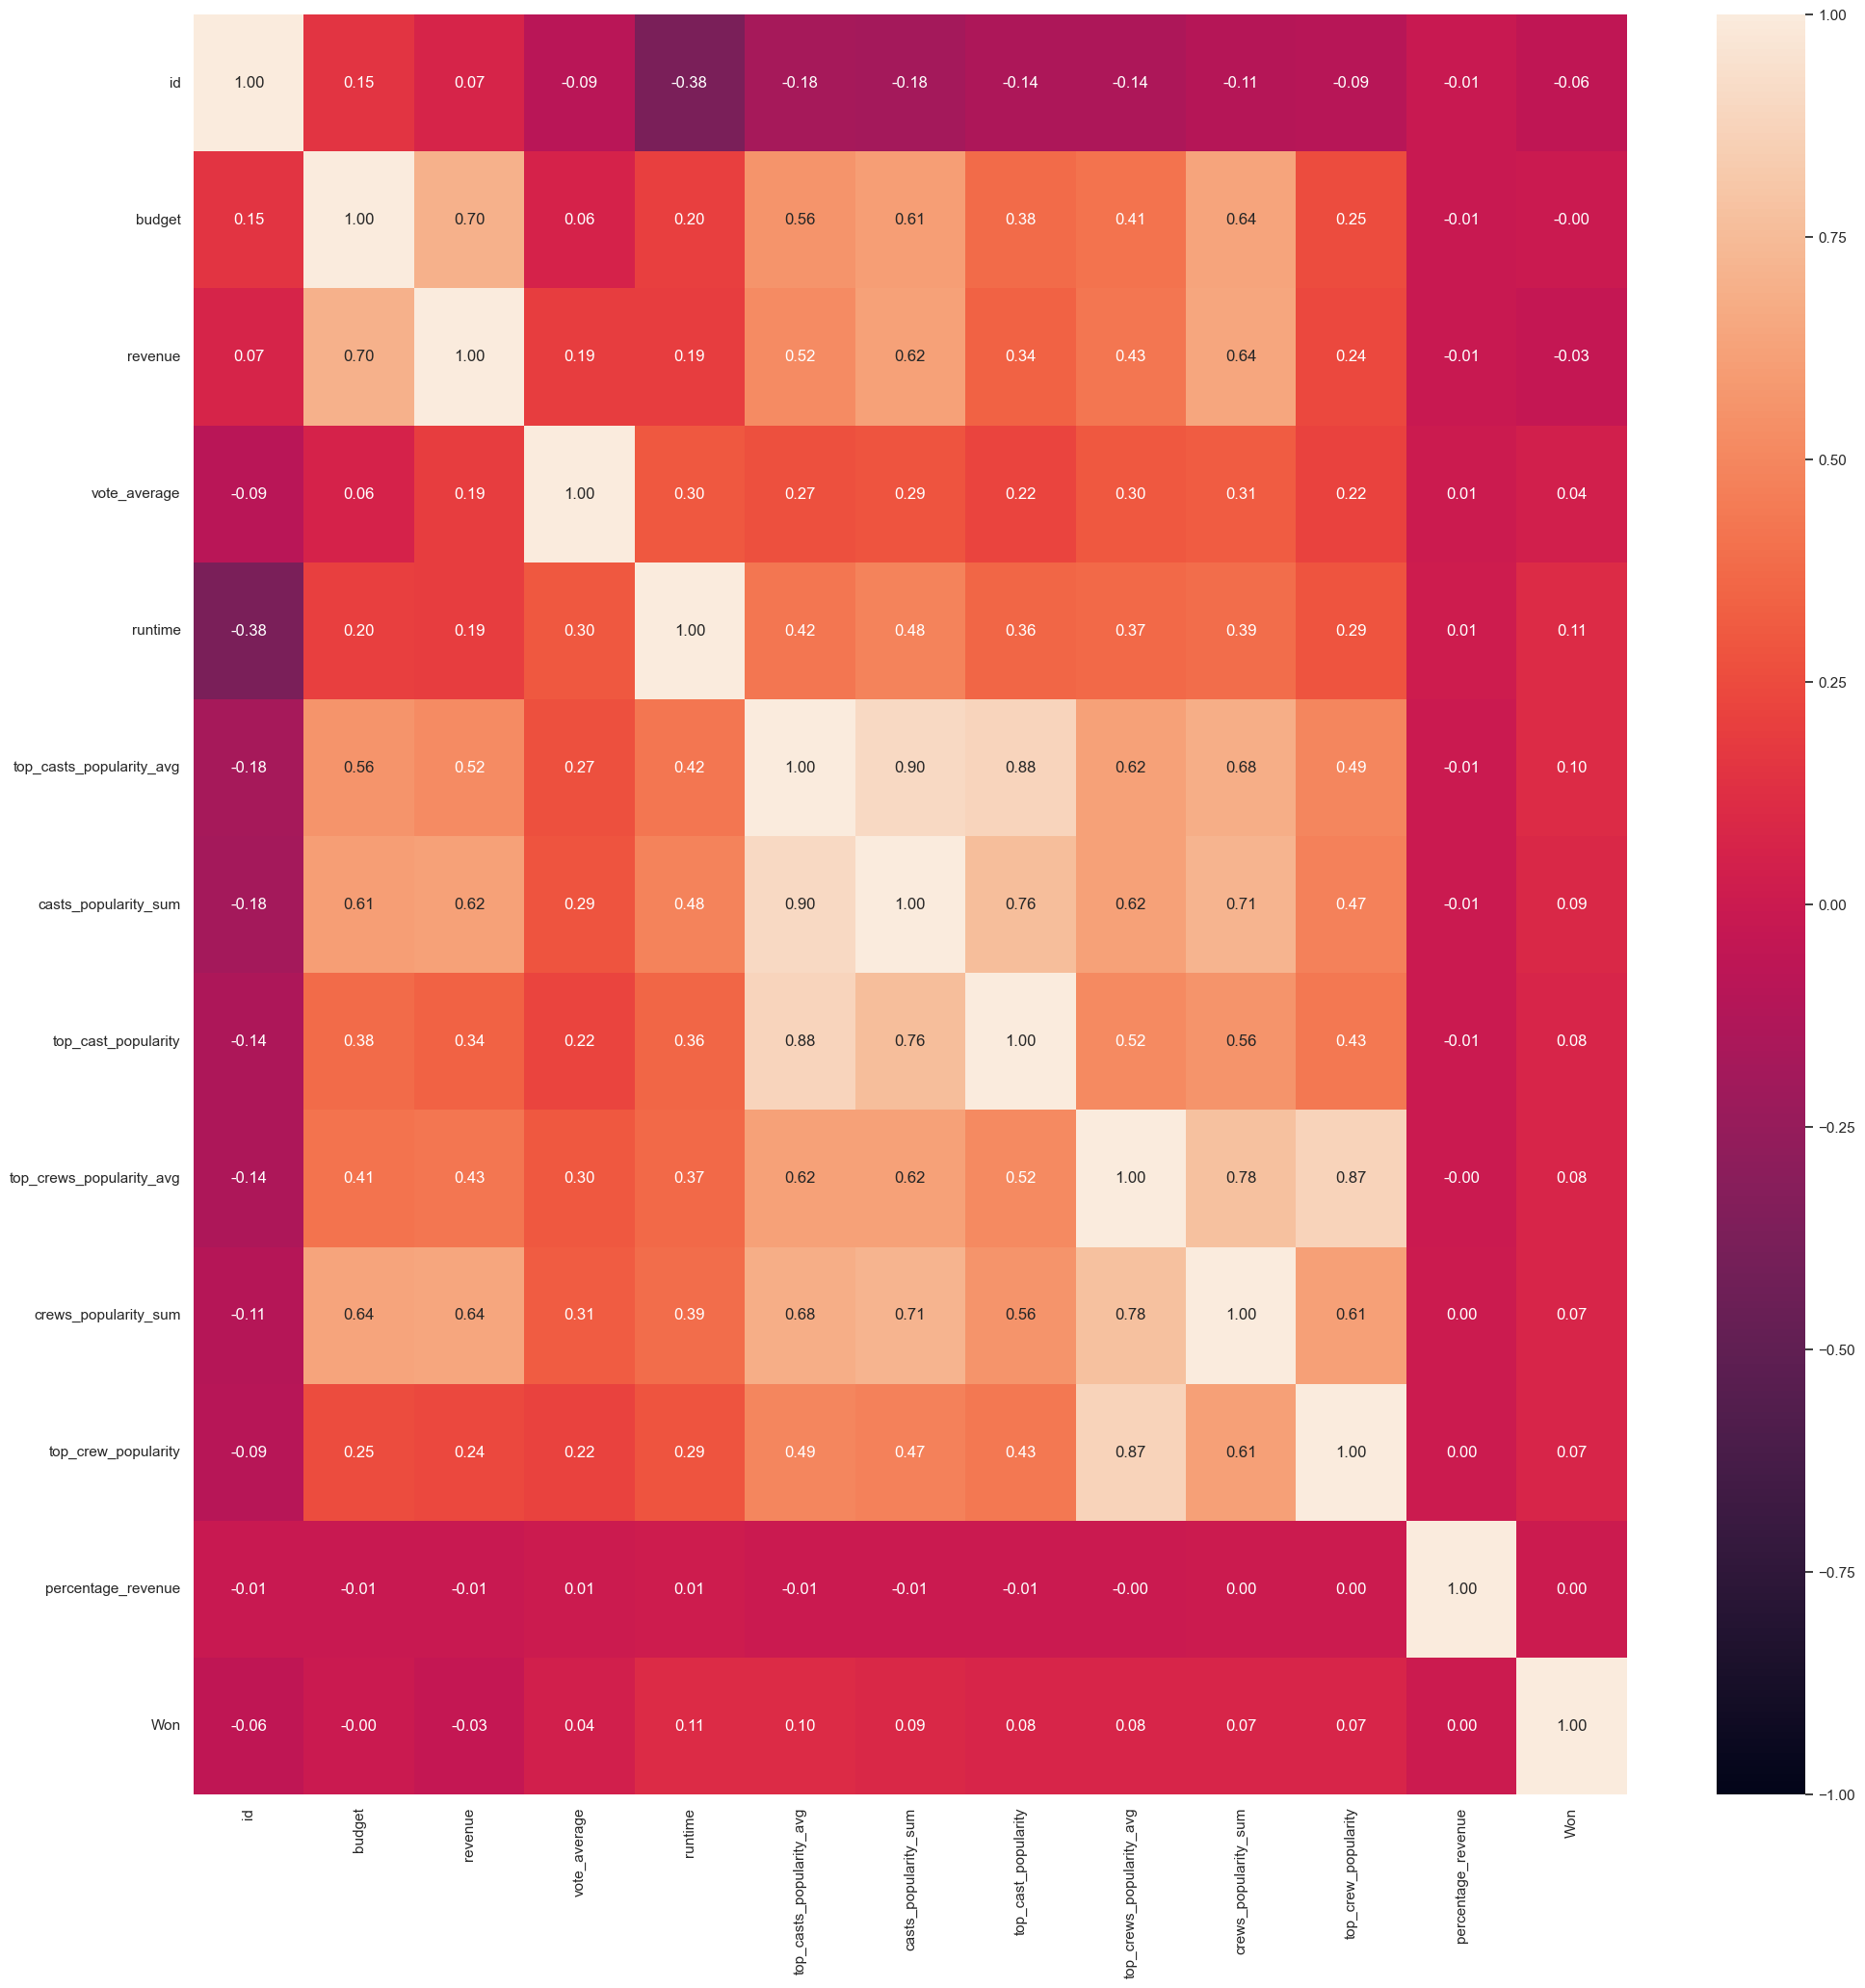

In [13]:

f = plt.figure(figsize=(24,24))
sb.heatmap(movieDB.corr(), vmin=-1, vmax = 1, annot = True, fmt=".2f")

We can see that the following variables have some form of correlation with the movie winning; "vote_average", "runtime", "percentage_revenue", "cast_popularity" & "crew_popularity"

### Testing for whether there's a link between vote_average

In [8]:
# Importing essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Creating all the separate DataFrames

In [9]:
won = pd.DataFrame(movieDB['Won'])
runtime = pd.DataFrame(movieDB['runtime'])
castSum = pd.DataFrame(movieDB['casts_popularity_sum'])
crewSum = pd.DataFrame(movieDB['crews_popularity_sum'])
voteAvg = pd.DataFrame(movieDB['vote_average'])
percRev = pd.DataFrame(movieDB['percentage_revenue'])


# Creating the Test and Train Sets for decision tree generation later

In [10]:
# Splitting the dataset into the Training set and Test set
# 80% of the data will be used for training and 20% for test based on runtime
won_train, won_test, runtime_train, runtime_test = train_test_split(won, runtime, test_size = 0.2, random_state=50)
print("Runtime Set")
print("Train Set :", won_train.shape, runtime_train.shape)
print("Test Set  :", won_test.shape, runtime_test.shape)

# Based on castSum
won_train2, won_test2, castSum_train, castSum_test = train_test_split(won, castSum, test_size = 0.2, random_state=50)
print("Cast Set")
print("Train Set :", won_train2.shape, castSum_train.shape)
print("Test Set  :", won_test2.shape, castSum_test.shape)

# Based on crewSum
won_train3, won_test3, crewSum_train, crewSum_test = train_test_split(won, crewSum, test_size = 0.2, random_state=50)
print("Crew Set")
print("Train Set :", won_train3.shape, crewSum_train.shape)
print("Test Set  :", won_test3.shape, crewSum_test.shape)

# Based on voteAvg
won_train4, won_test4, voteAvg_train, voteAvg_test = train_test_split(won, voteAvg, test_size = 0.2, random_state=50)
print("Vote Avg Set")
print("Train Set :", won_train4.shape, voteAvg_train.shape)
print("Test Set  :", won_test4.shape, voteAvg_test.shape)

# Based on percRev (is using 6 as 5 used for multiVar and this was later added)
won_train6, won_test6, percRev_train, percRev_test = train_test_split(won, percRev, test_size = 0.2, random_state=50)
print("Percentage Revenue Set")
print("Train Set :", won_train6.shape, percRev_train.shape)
print("Test Set  :", won_test6.shape, percRev_test.shape)

Runtime Set
Train Set : (7689, 1) (7689, 1)
Test Set  : (1923, 1) (1923, 1)
Cast Set
Train Set : (7689, 1) (7689, 1)
Test Set  : (1923, 1) (1923, 1)
Crew Set
Train Set : (7689, 1) (7689, 1)
Test Set  : (1923, 1) (1923, 1)
Vote Avg Set
Train Set : (7689, 1) (7689, 1)
Test Set  : (1923, 1) (1923, 1)
Percentage Revenue Set
Train Set : (7689, 1) (7689, 1)
Test Set  : (1923, 1) (1923, 1)


In [11]:
#function to print TPR, FPR ETC
def binary_metric(y_true, y_pred):
    CM = confusion_matrix(y_true, y_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    return TPR, FPR
    

## Runtime 

<AxesSubplot: >

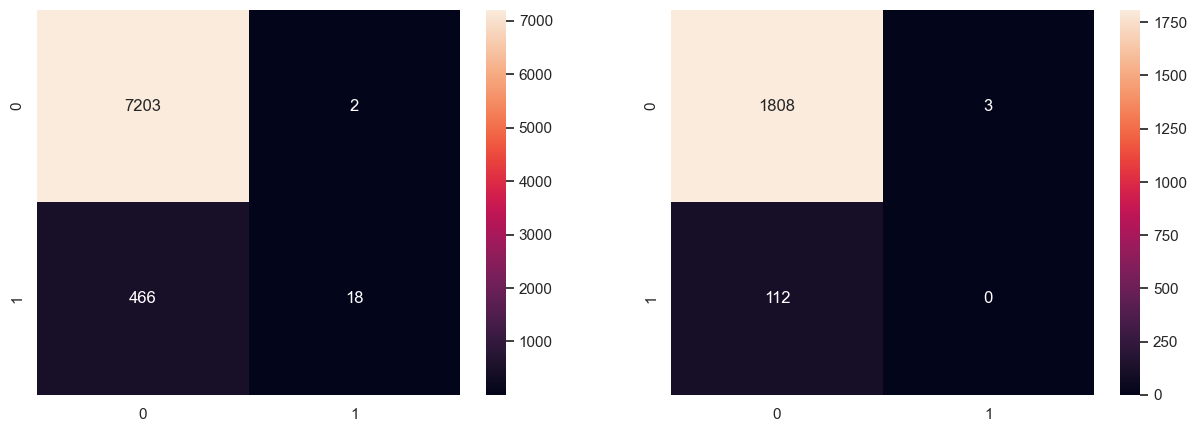

In [12]:
# Decision Tree
dectree = DecisionTreeClassifier(max_depth = 20)
dectree.fit(runtime_train, won_train)

# Predicting the Test set results
runtime_train_pred = dectree.predict(runtime_train)
runtime_test_pred = dectree.predict(runtime_test)

# Confusion Matrix for Train and Test Set
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sb.heatmap(confusion_matrix(won_train, runtime_train_pred), annot = True, fmt = "d", ax = ax[0])
sb.heatmap(confusion_matrix(won_test, runtime_test_pred), annot = True, fmt = "d", ax = ax[1])

In [13]:
# Classificiation Accuracy for Runtime of movie

TPRTrain, FPRTrain = binary_metric(won_train, runtime_train_pred)
TPRTest, FPRTest = binary_metric(won_test, runtime_test_pred)
print("Variable: Runtime")
print("Classification Accuracy for train data:\t", dectree.score(runtime_train, won_train))
print("Classification Accuracy for test data:\t", dectree.score(runtime_test, won_test))
print("TPR for train:\t", TPRTrain)
print("FPR for train:\t", FPRTrain)

print("TPR for test:\t", TPRTest)
print("FPR for train:\t", FPRTest)


Variable: Runtime
Classification Accuracy for train data:	 0.9391338275458447
Classification Accuracy for test data:	 0.9401976079043162
TPR for train:	 0.0371900826446281
FPR for train:	 0.0002775850104094379
TPR for test:	 0.0
FPR for train:	 0.0016565433462175593


[Text(0.3986782962328767, 0.9666666666666667, 'runtime <= 117.5\ngini = 0.118\nsamples = 7689\nvalue = [7205, 484]\nclass = Won'),
 Text(0.17915239726027396, 0.9, 'runtime <= 107.5\ngini = 0.066\nsamples = 5831\nvalue = [5632, 199]\nclass = Won'),
 Text(0.11001712328767123, 0.8333333333333334, 'runtime <= 98.5\ngini = 0.047\nsamples = 4568\nvalue = [4458, 110]\nclass = Won'),
 Text(0.038527397260273974, 0.7666666666666667, 'runtime <= 27.5\ngini = 0.033\nsamples = 2910\nvalue = [2861, 49]\nclass = Won'),
 Text(0.0136986301369863, 0.7, 'runtime <= 26.5\ngini = 0.124\nsamples = 15\nvalue = [14, 1]\nclass = Won'),
 Text(0.00684931506849315, 0.6333333333333333, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]\nclass = Won'),
 Text(0.02054794520547945, 0.6333333333333333, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Won'),
 Text(0.06335616438356165, 0.7, 'runtime <= 85.5\ngini = 0.033\nsamples = 2895\nvalue = [2847, 48]\nclass = Won'),
 Text(0.03424657534246575, 0.6333333333333333, 'runtime 

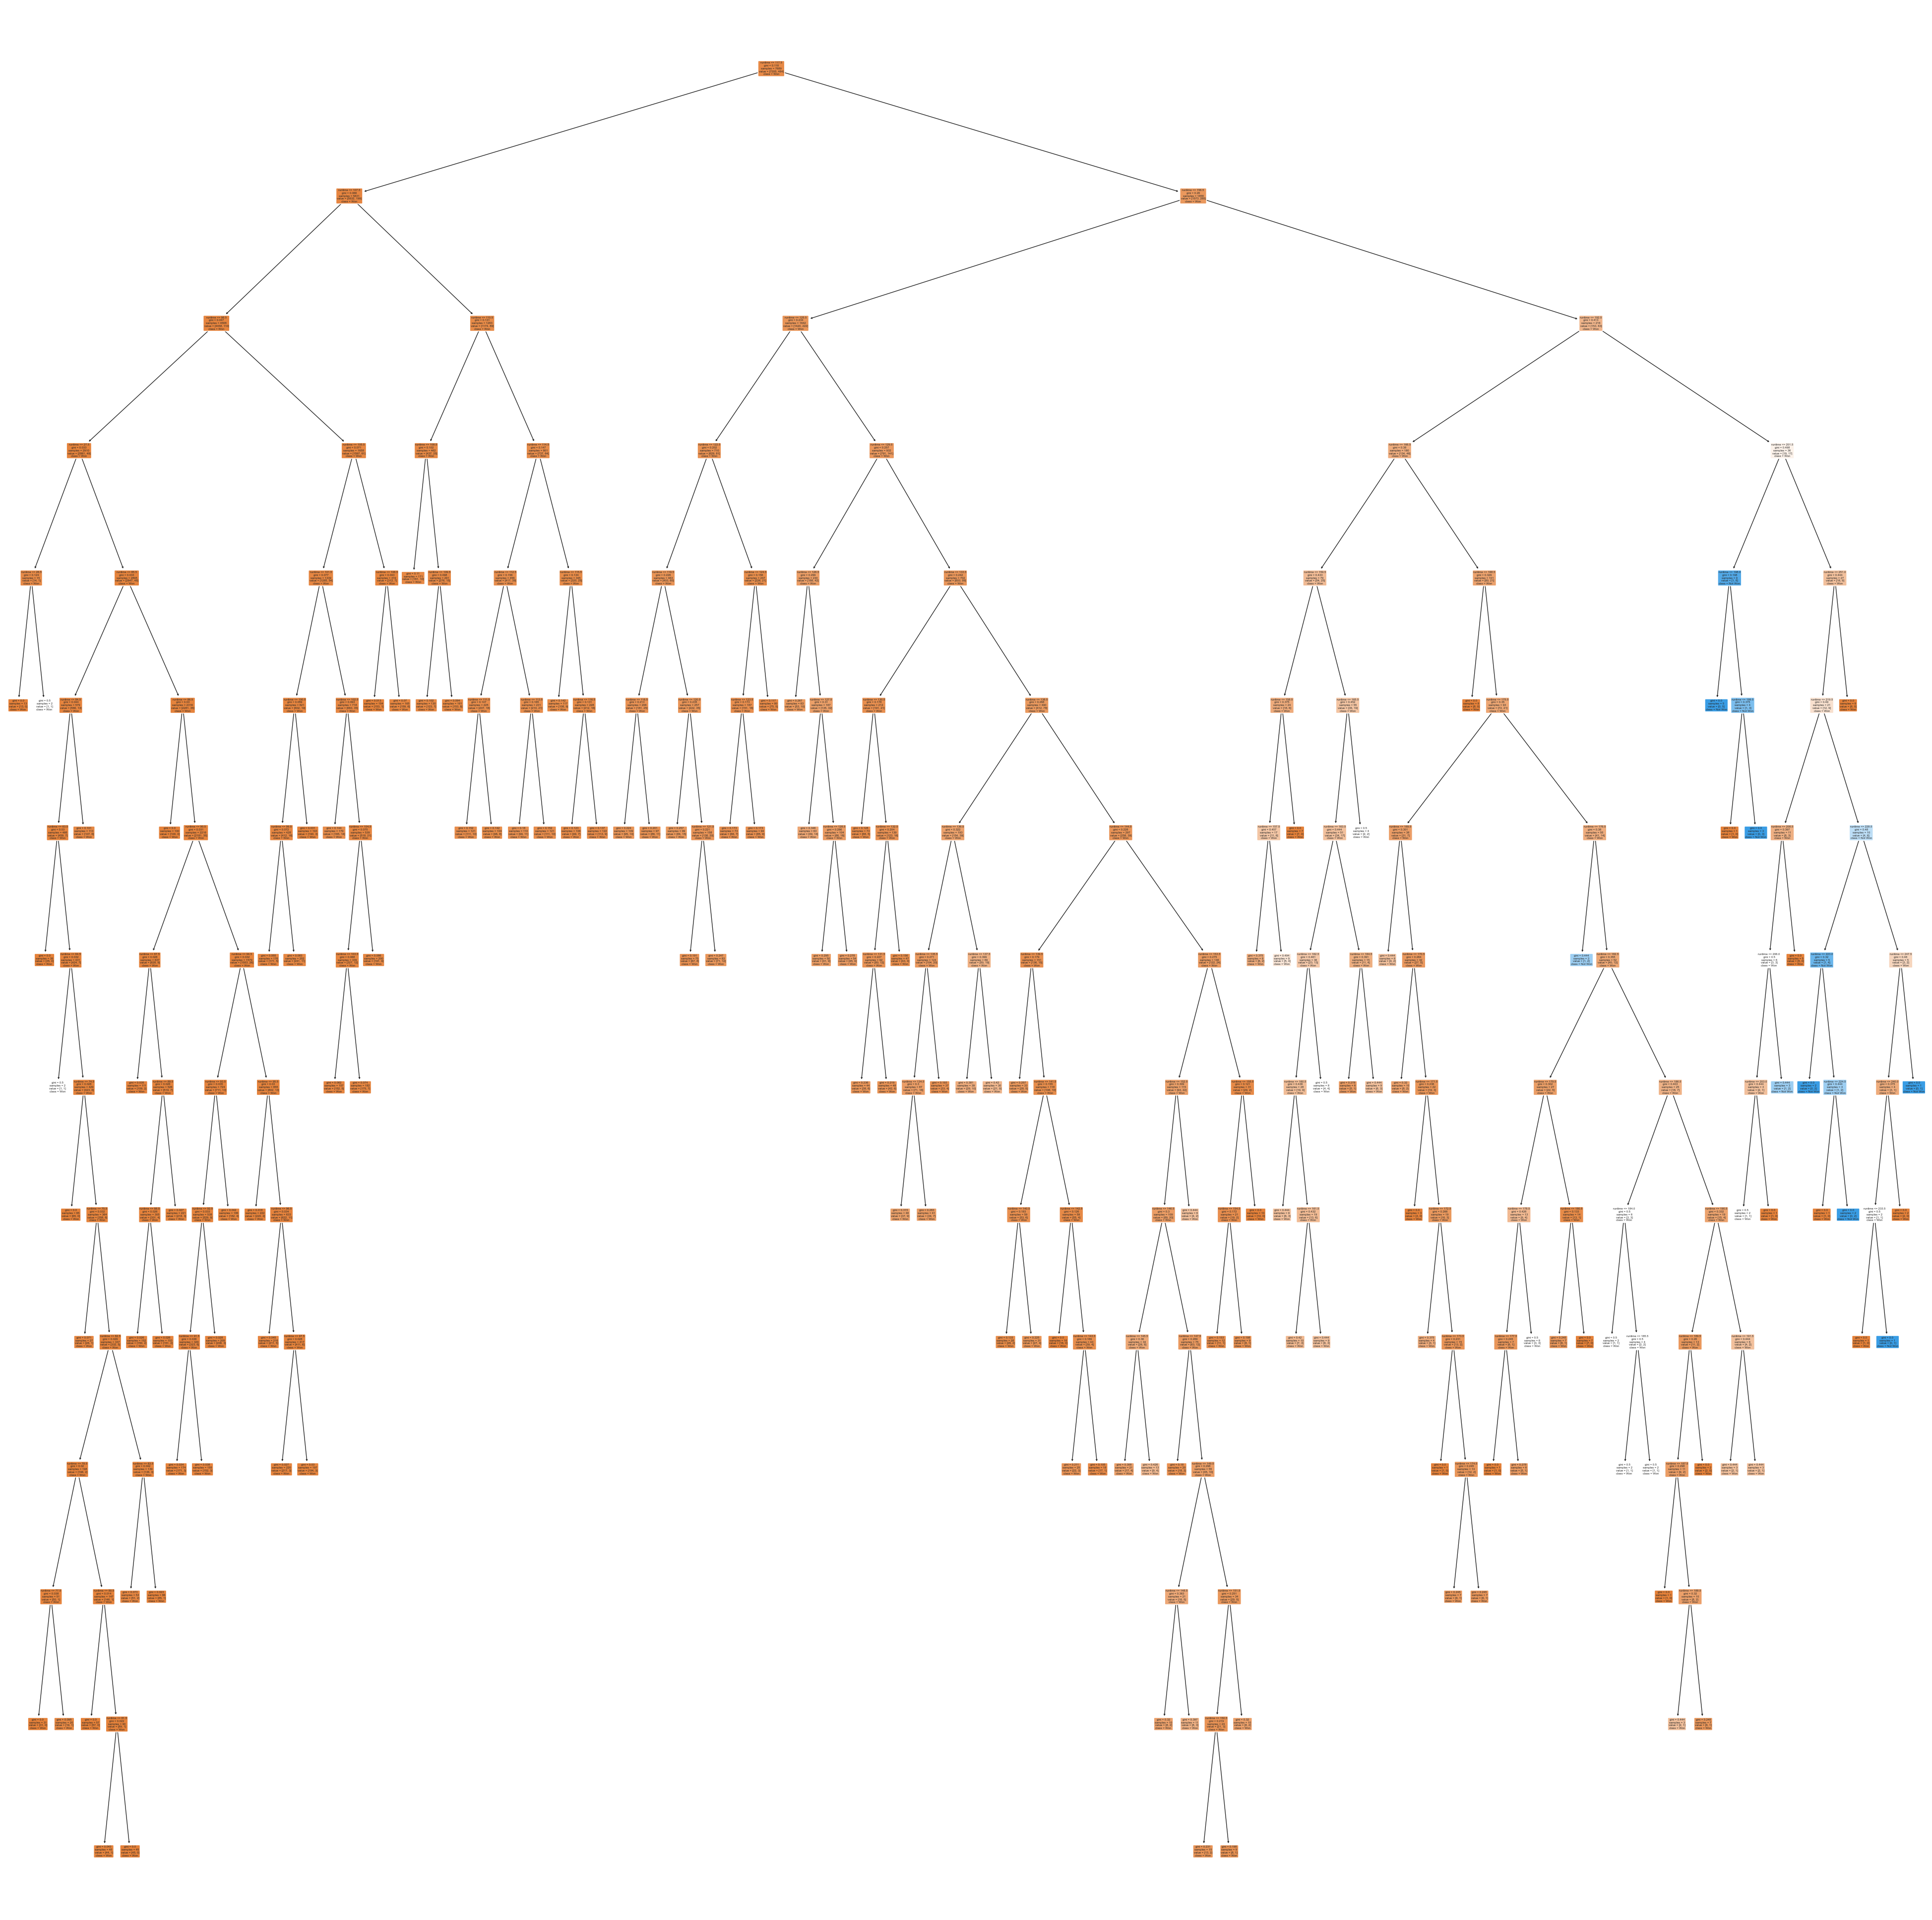

In [14]:
# Printing decision Tree
f = plt.figure(figsize=(50,50))
plot_tree(dectree, filled = True, rounded = True, class_names = ["Won", "Not Won"], feature_names = ["runtime"])

## CastSum

<AxesSubplot: >

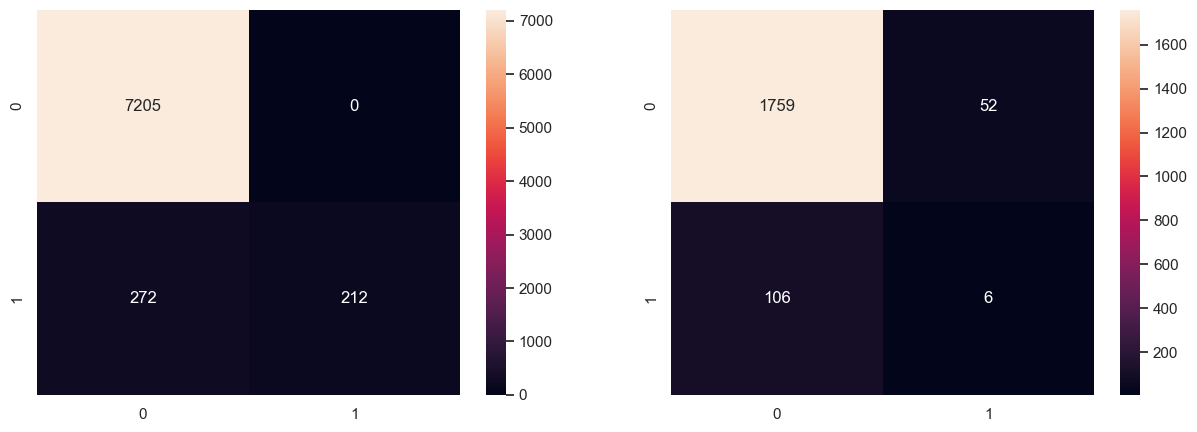

In [15]:
# Decision Tree for castSum
dectree2 = DecisionTreeClassifier(max_depth = 20)
dectree2.fit(castSum_train, won_train2)

# Predicting the Test set results
castSum_train_pred = dectree2.predict(castSum_train)
castSum_test_pred = dectree2.predict(castSum_test)

# Confusion Matrix for Train and Test Set
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sb.heatmap(confusion_matrix(won_train2, castSum_train_pred), annot = True, fmt = "d", ax = ax[0])
sb.heatmap(confusion_matrix(won_test2, castSum_test_pred), annot = True, fmt = "d", ax = ax[1])

In [16]:
TPRTrain, FPRTrain = binary_metric(won_train2, castSum_train_pred)
TPRTest, FPRTest = binary_metric(won_test2, castSum_test_pred)
print("Variable: Cast Summary")
print("Classification Accuracy for train data:\t", dectree2.score(castSum_train, won_train2))
print("Classification Accuracy for test data:\t", dectree2.score(castSum_test, won_test2))
print("TPR for train:\t", TPRTrain)
print("FPR for train:\t", FPRTrain)

print("TPR for test:\t", TPRTest)
print("FPR for train:\t", FPRTest)


Variable: Cast Summary
Classification Accuracy for train data:	 0.9646247886591234
Classification Accuracy for test data:	 0.9178367134685388
TPR for train:	 0.4380165289256198
FPR for train:	 0.0
TPR for test:	 0.05357142857142857
FPR for train:	 0.02871341800110436


[Text(0.4210111516568981, 0.9761904761904762, 'castSum <= 301.495\ngini = 0.118\nsamples = 7689\nvalue = [7205, 484]\nclass = Won'),
 Text(0.15700201476555456, 0.9285714285714286, 'castSum <= 66.594\ngini = 0.101\nsamples = 6489\nvalue = [6142, 347]\nclass = Won'),
 Text(0.07146077547339946, 0.8809523809523809, 'castSum <= 35.179\ngini = 0.052\nsamples = 1243\nvalue = [1210, 33]\nclass = Won'),
 Text(0.034265103697024346, 0.8333333333333334, 'castSum <= 28.507\ngini = 0.032\nsamples = 434\nvalue = [427, 7]\nclass = Won'),
 Text(0.030658250676284943, 0.7857142857142857, 'castSum <= 28.483\ngini = 0.042\nsamples = 326\nvalue = [319, 7]\nclass = Won'),
 Text(0.027051397655545536, 0.7380952380952381, 'castSum <= 27.785\ngini = 0.036\nsamples = 325\nvalue = [319, 6]\nclass = Won'),
 Text(0.018034265103697024, 0.6904761904761905, 'castSum <= 13.137\ngini = 0.031\nsamples = 314\nvalue = [309, 5]\nclass = Won'),
 Text(0.010820559062218215, 0.6428571428571429, 'castSum <= 13.043\ngini = 0.065\n

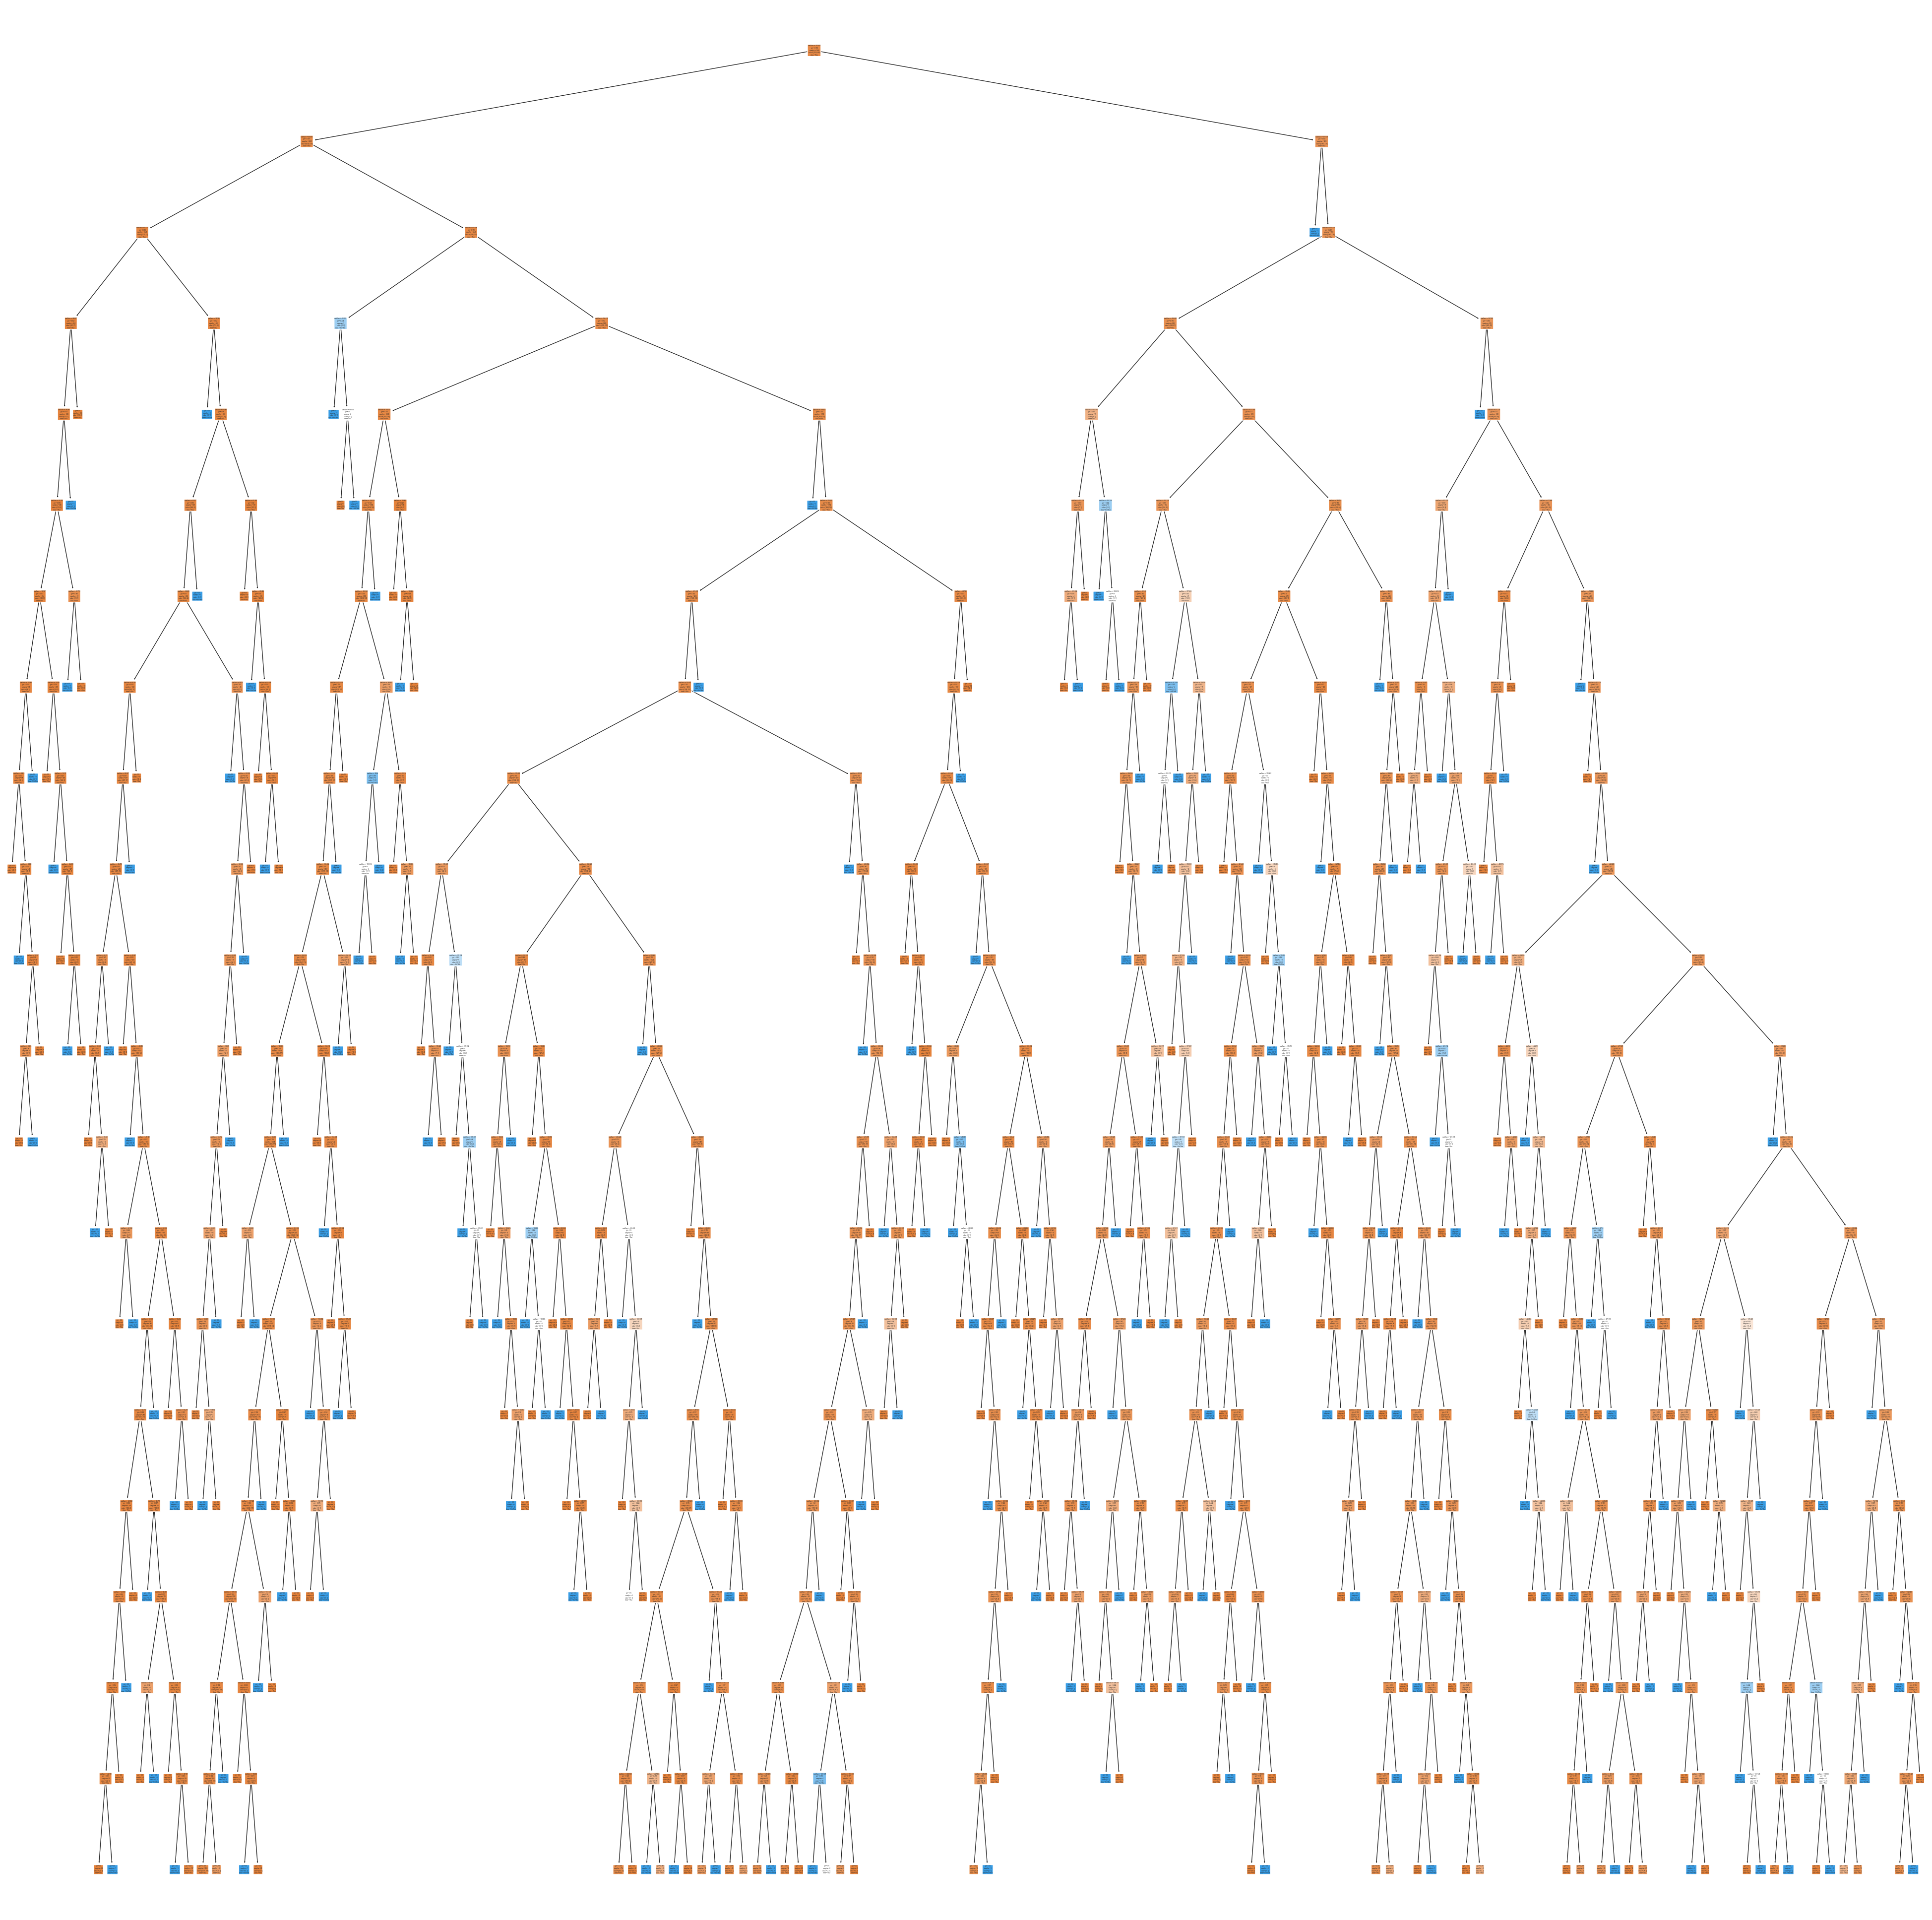

In [17]:
# Printing decision Tree
f = plt.figure(figsize=(50,50))
plot_tree(dectree2, filled = True, rounded = True, class_names = ["Won", "Not Won"], feature_names = ["castSum"])

## CrewSum

<AxesSubplot: >

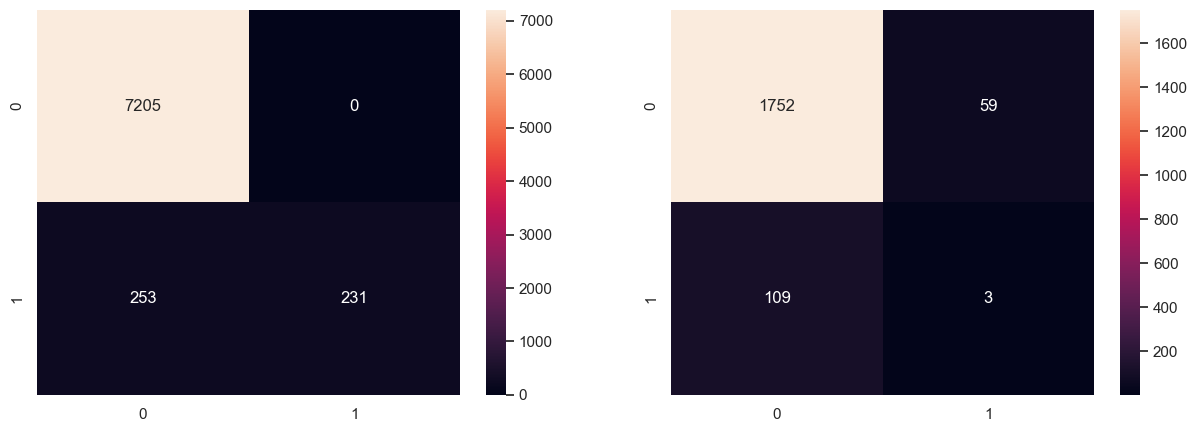

In [18]:
# Decision Tree for crewSum
dectree3 = DecisionTreeClassifier(max_depth = 20)
dectree3.fit(crewSum_train, won_train3)

# Predicting the Test set results
crewSum_train_pred = dectree3.predict(crewSum_train)
crewSum_test_pred = dectree3.predict(crewSum_test)

# Confusion Matrix for Train and Test Set
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sb.heatmap(confusion_matrix(won_train3, crewSum_train_pred), annot = True, fmt = "d", ax = ax[0])
sb.heatmap(confusion_matrix(won_test3, crewSum_test_pred), annot = True, fmt = "d", ax = ax[1])

In [19]:
TPRTrain, FPRTrain = binary_metric(won_train3, crewSum_train_pred)
TPRTest, FPRTest = binary_metric(won_test3, crewSum_test_pred)
print("Variable: Runtime")
print("Classification Accuracy for train data:\t", dectree3.score(crewSum_train, won_train3))
print("Classification Accuracy for test data:\t", dectree3.score(crewSum_test, won_test3))
print("TPR for train:\t", TPRTrain)
print("FPR for train:\t", FPRTrain)

print("TPR for test:\t", TPRTest)
print("FPR for train:\t", FPRTest)

Variable: Runtime
Classification Accuracy for train data:	 0.9670958512160229
Classification Accuracy for test data:	 0.9126365054602185
TPR for train:	 0.4772727272727273
FPR for train:	 0.0
TPR for test:	 0.026785714285714284
FPR for train:	 0.03257868580894534


[Text(0.551211052378055, 0.9761904761904762, 'crewSum <= 201.597\ngini = 0.118\nsamples = 7689\nvalue = [7205, 484]\nclass = Won'),
 Text(0.2361813583815029, 0.9285714285714286, 'crewSum <= 21.339\ngini = 0.107\nsamples = 7150\nvalue = [6746, 404]\nclass = Won'),
 Text(0.018659365175945644, 0.8809523809523809, 'crewSum <= 11.484\ngini = 0.03\nsamples = 1232\nvalue = [1213, 19]\nclass = Won'),
 Text(0.015414258188824663, 0.8333333333333334, 'gini = 0.0\nsamples = 445\nvalue = [445, 0]\nclass = Won'),
 Text(0.021904472163066627, 0.8333333333333334, 'crewSum <= 11.486\ngini = 0.047\nsamples = 787\nvalue = [768, 19]\nclass = Won'),
 Text(0.018659365175945644, 0.7857142857142857, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Not Won'),
 Text(0.025149579150187607, 0.7857142857142857, 'crewSum <= 11.562\ngini = 0.045\nsamples = 786\nvalue = [768, 18]\nclass = Won'),
 Text(0.009735320961362945, 0.7380952380952381, 'crewSum <= 11.556\ngini = 0.219\nsamples = 8\nvalue = [7, 1]\nclass = Won')

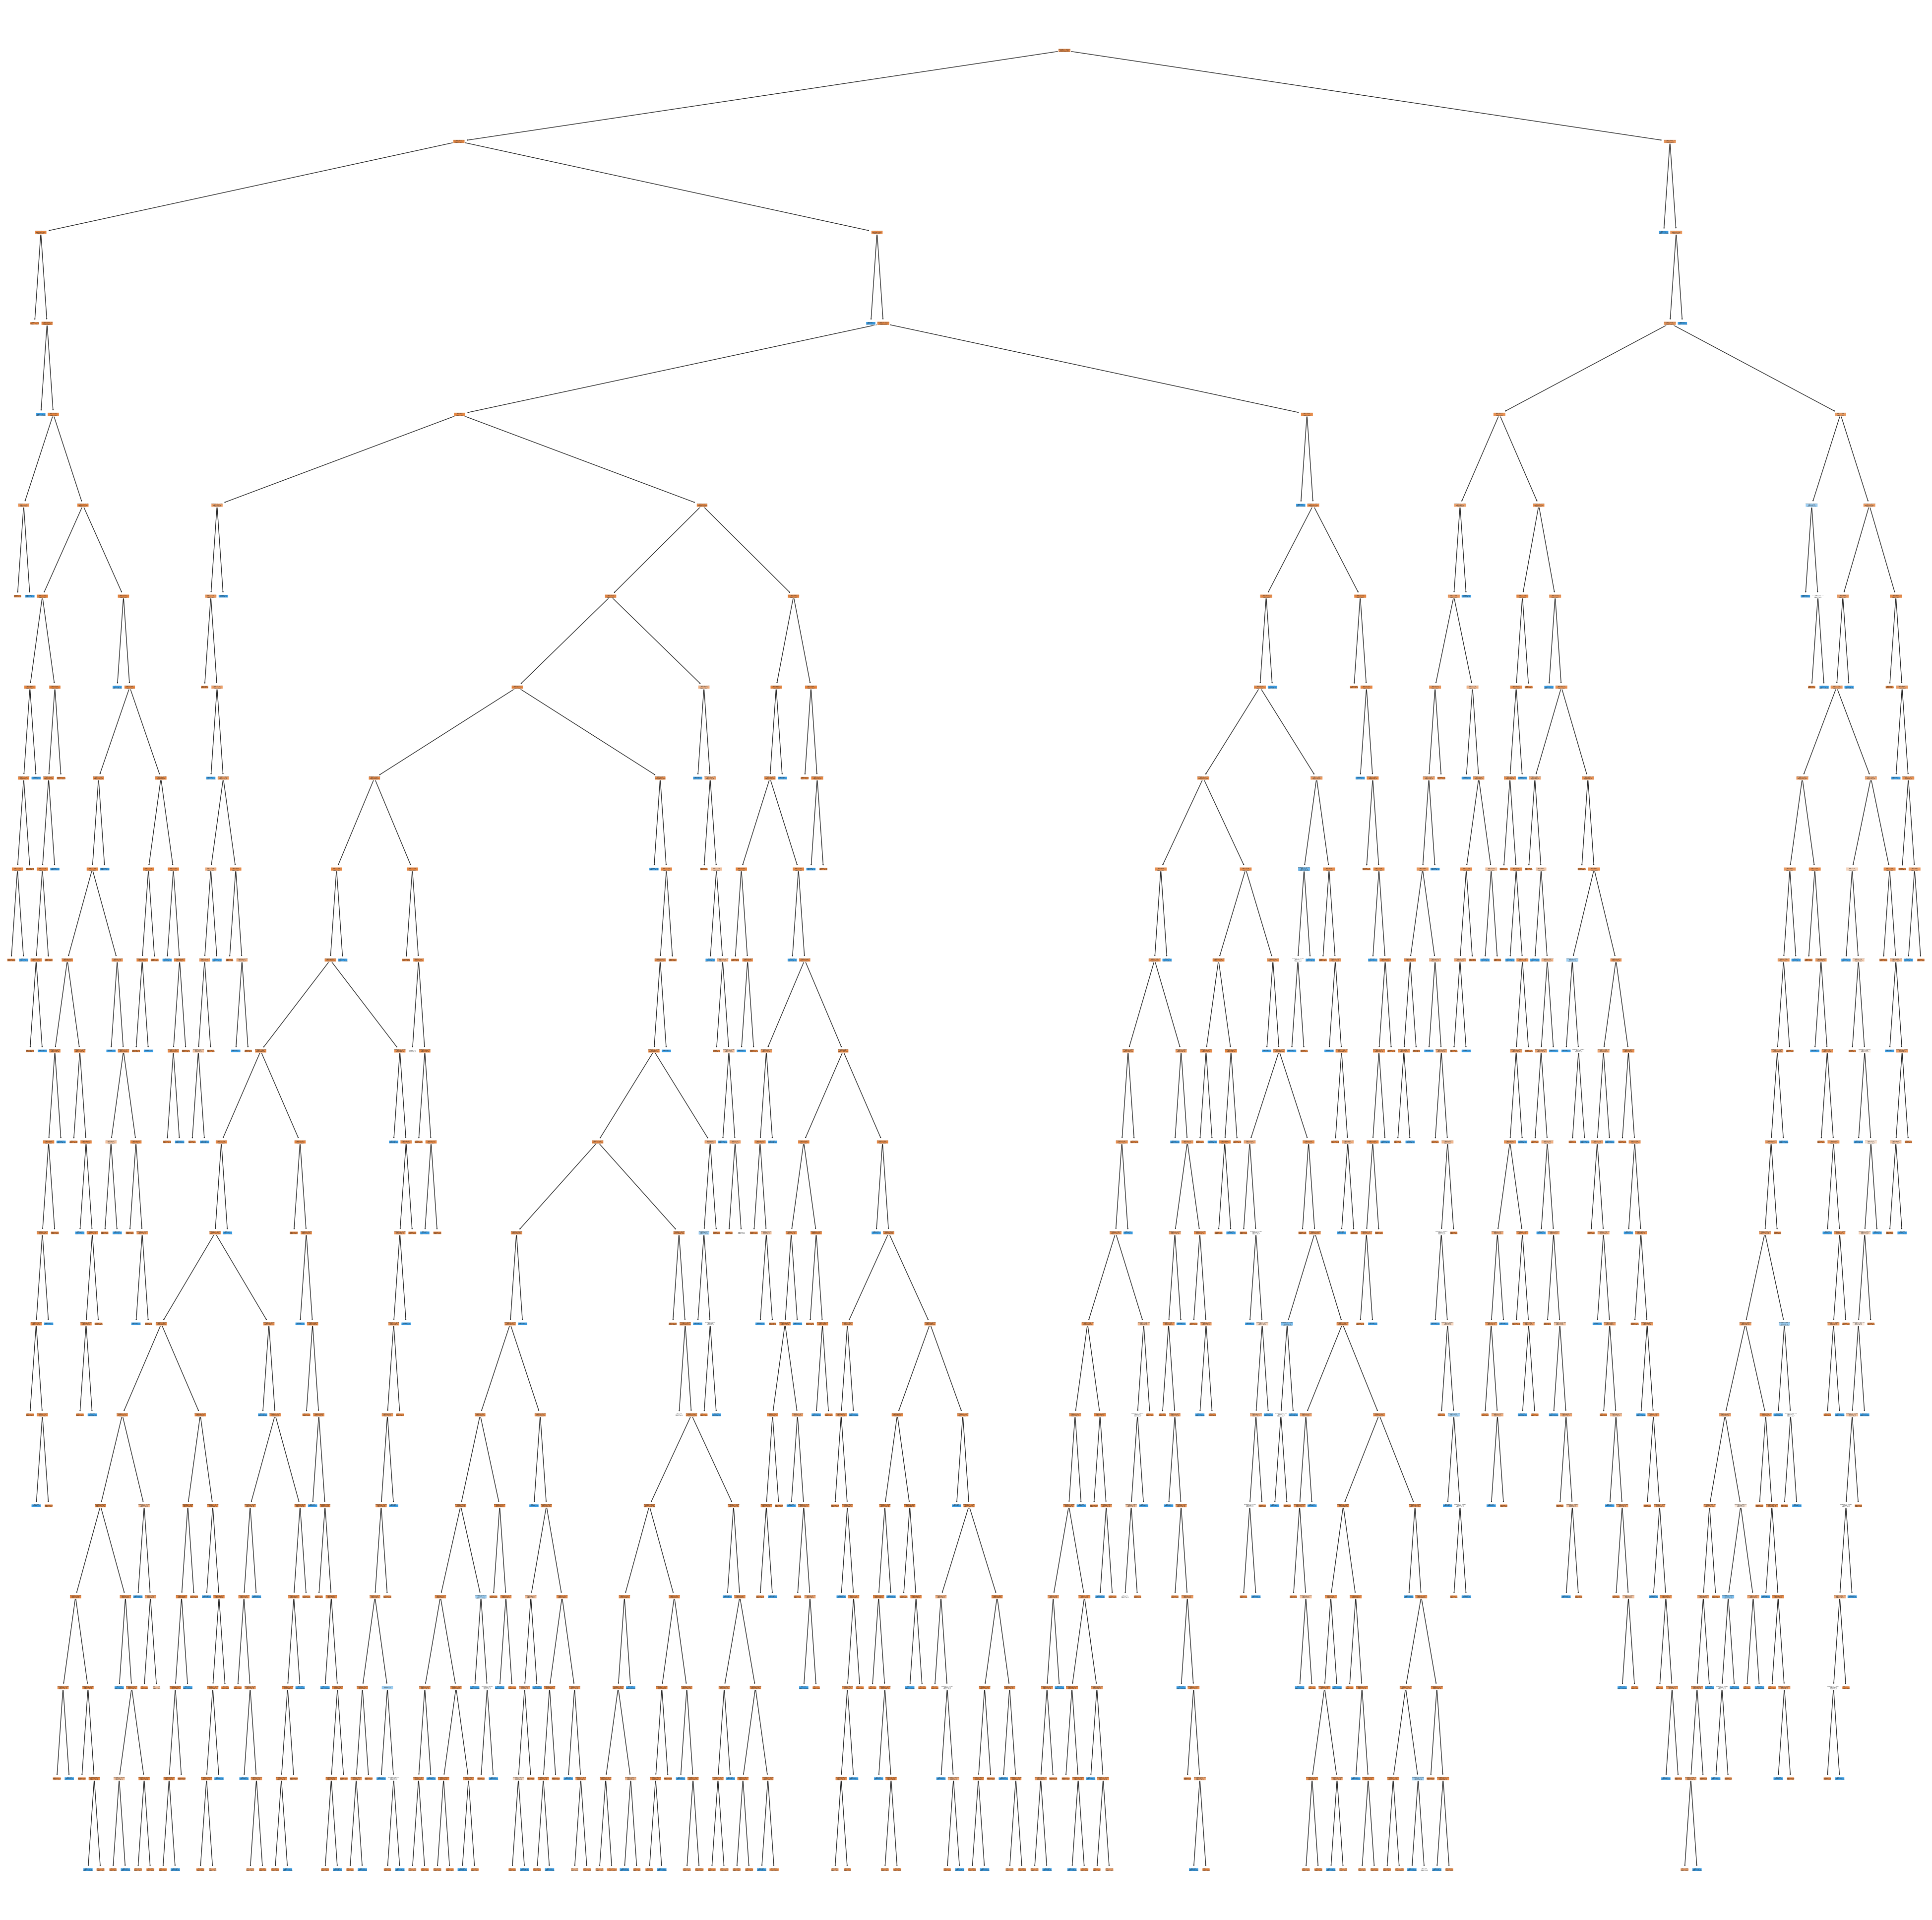

In [20]:
# Printing decision Tree
f = plt.figure(figsize=(50,50))
plot_tree(dectree3, filled = True, rounded = True, class_names = ["Won", "Not Won"], feature_names = ["crewSum"])

## VoteAvg

<AxesSubplot: >

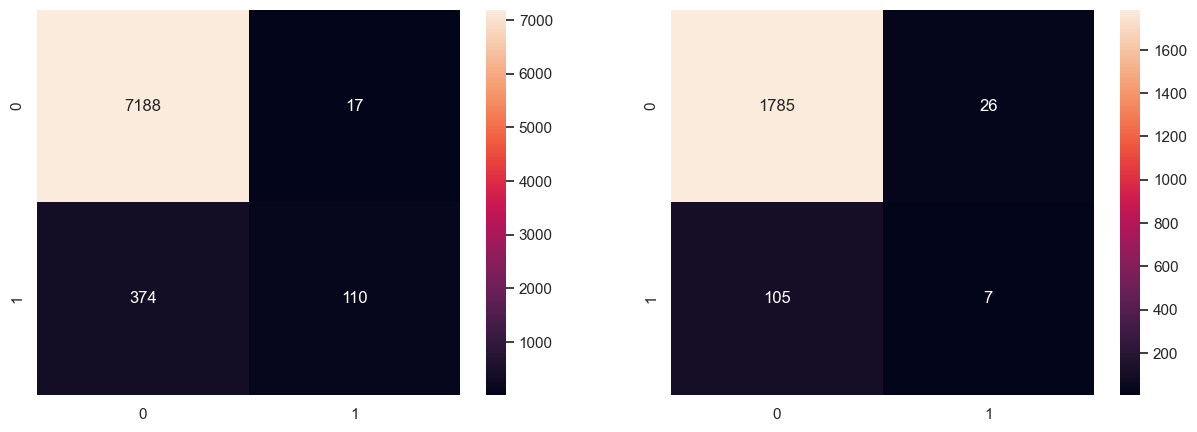

In [21]:
# Decision Tree for voteAvg
dectree4 = DecisionTreeClassifier(max_depth = 20)
dectree4.fit(voteAvg_train, won_train4)

# Predicting the Test set results
voteAvg_train_pred = dectree4.predict(voteAvg_train)
voteAvg_test_pred = dectree4.predict(voteAvg_test)

# Confusion Matrix for Train and Test Set
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sb.heatmap(confusion_matrix(won_train4, voteAvg_train_pred), annot = True, fmt = "d", ax = ax[0])
sb.heatmap(confusion_matrix(won_test4, voteAvg_test_pred), annot = True, fmt = "d", ax = ax[1])

In [22]:
TPRTrain, FPRTrain = binary_metric(won_train4, voteAvg_train_pred)
TPRTest, FPRTest = binary_metric(won_test4, voteAvg_test_pred)
print("Variable: Vote Average")
print("Classification Accuracy for train data:\t", dectree4.score(voteAvg_train, won_train4))
print("Classification Accuracy for test data:\t", dectree4.score(voteAvg_test, won_test4))
print("TPR for train:\t", TPRTrain)
print("FPR for train:\t", FPRTrain)

print("TPR for test:\t", TPRTest)
print("FPR for train:\t", FPRTest)

Variable: Vote Average
Classification Accuracy for train data:	 0.94914813369749
Classification Accuracy for test data:	 0.9318772750910036
TPR for train:	 0.22727272727272727
FPR for train:	 0.002359472588480222
TPR for test:	 0.0625
FPR for train:	 0.01435670900055218


[Text(0.4341095258604805, 0.9761904761904762, 'voteAvg <= 7.156\ngini = 0.118\nsamples = 7689\nvalue = [7205, 484]\nclass = Won'),
 Text(0.18882665094339623, 0.9285714285714286, 'voteAvg <= 6.822\ngini = 0.052\nsamples = 5951\nvalue = [5791, 160]\nclass = Won'),
 Text(0.07923054245283019, 0.8809523809523809, 'voteAvg <= 6.165\ngini = 0.032\nsamples = 4929\nvalue = [4848, 81]\nclass = Won'),
 Text(0.025685436320754717, 0.8333333333333334, 'voteAvg <= 5.539\ngini = 0.013\nsamples = 2659\nvalue = [2642, 17]\nclass = Won'),
 Text(0.017099056603773585, 0.7857142857142857, 'voteAvg <= 4.905\ngini = 0.002\nsamples = 1033\nvalue = [1032, 1]\nclass = Won'),
 Text(0.01474056603773585, 0.7380952380952381, 'voteAvg <= 4.899\ngini = 0.006\nsamples = 310\nvalue = [309, 1]\nclass = Won'),
 Text(0.012382075471698114, 0.6904761904761905, 'gini = 0.0\nsamples = 288\nvalue = [288, 0]\nclass = Won'),
 Text(0.017099056603773585, 0.6904761904761905, 'gini = 0.087\nsamples = 22\nvalue = [21, 1]\nclass = Won'

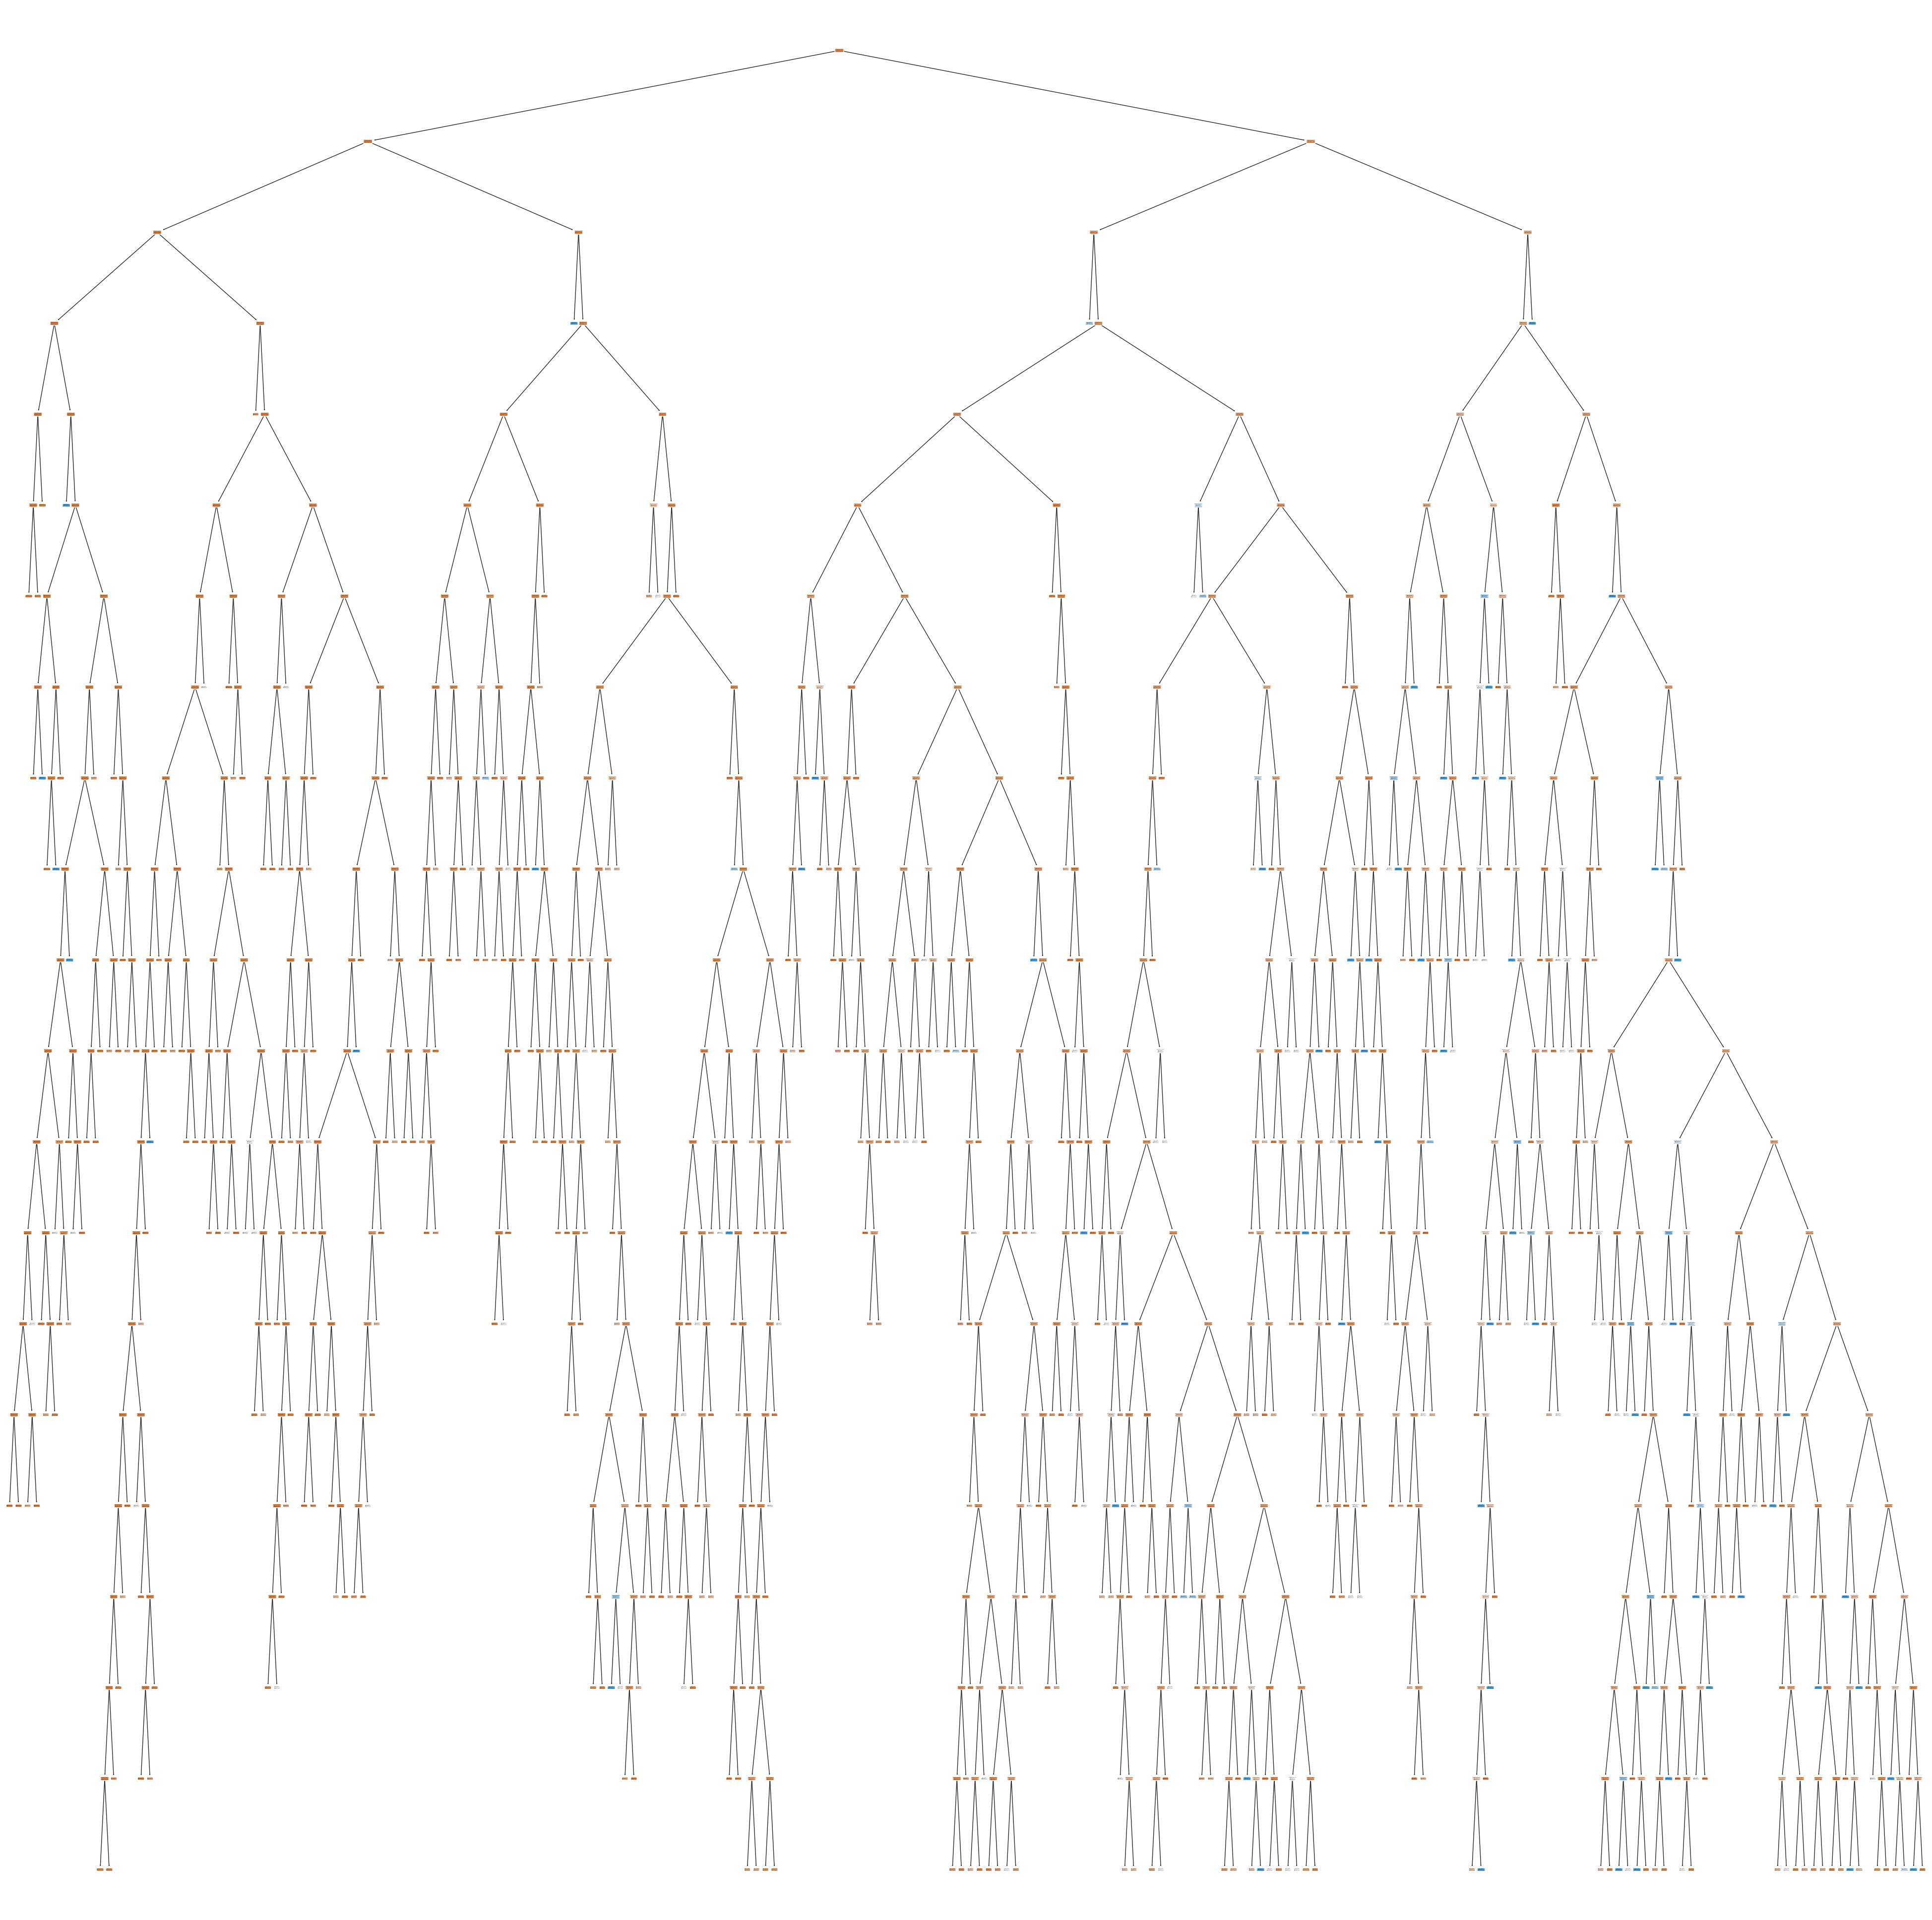

In [23]:
# Printing decision Tree
f = plt.figure(figsize=(50,50))
plot_tree(dectree4, filled = True, rounded = True, class_names = ["Won", "Not Won"], feature_names = ["voteAvg"])

### Percentage Revenue Analyst with winning an Oscar Award

<AxesSubplot: >

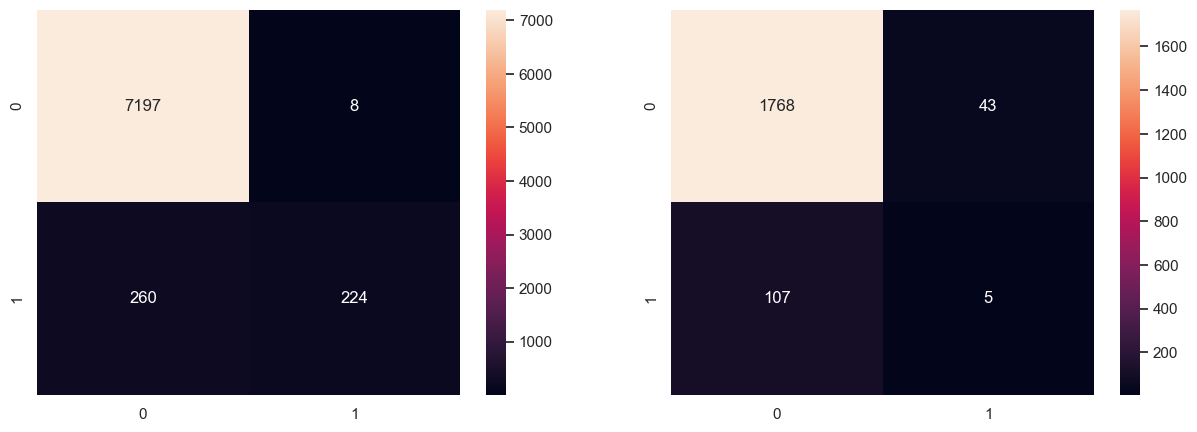

In [24]:
dectree6 = DecisionTreeClassifier(max_depth=20)
dectree6.fit(percRev_train, won_train6)

precRev_train_pred = dectree6.predict(percRev_train)
precRev_test_pred = dectree6.predict(percRev_test)

f, ax = plt.subplots(1, 2, figsize = (15, 5))
sb.heatmap(confusion_matrix(won_train6, precRev_train_pred), annot = True, fmt = "d", ax = ax[0])
sb.heatmap(confusion_matrix(won_test6, precRev_test_pred), annot = True, fmt = "d", ax = ax[1])

In [28]:
# Classificiation Accuracy for Perv Revenue

TPRTrain, FPRTrain = binary_metric(won_train6, precRev_train_pred)
TPRTest, FPRTest = binary_metric(won_test6, precRev_test_pred)
print("Variable: Percentage Revenue")
print("Classification Accuracy for train data:\t", dectree6.score(percRev_train, won_train6))
print("Classification Accuracy for test data:\t", dectree6.score(percRev_test, won_test6))
print("TPR for train:\t", TPRTrain)
print("FPR for train:\t", FPRTrain)

print("TPR for test:\t", TPRTest)
print("FPR for train:\t", FPRTest)

Variable: Percentage Revenue
Classification Accuracy for train data:	 0.9651450123553128
Classification Accuracy for test data:	 0.921996879875195
TPR for train:	 0.4628099173553719
FPR for train:	 0.0011103400416377516
TPR for test:	 0.044642857142857144
FPR for train:	 0.023743787962451683


[Text(0.44987534363779175, 0.9761904761904762, 'percentage_revenue <= 366.865\ngini = 0.118\nsamples = 7689\nvalue = [7205, 484]\nclass = Won'),
 Text(0.1511725763016158, 0.9285714285714286, 'percentage_revenue <= 206.735\ngini = 0.063\nsamples = 6198\nvalue = [5995, 203]\nclass = Won'),
 Text(0.06732495511669659, 0.8809523809523809, 'percentage_revenue <= 63.875\ngini = 0.05\nsamples = 5148\nvalue = [5015, 133]\nclass = Won'),
 Text(0.03949730700179533, 0.8333333333333334, 'percentage_revenue <= 32.725\ngini = 0.024\nsamples = 1004\nvalue = [992, 12]\nclass = Won'),
 Text(0.025134649910233394, 0.7857142857142857, 'percentage_revenue <= 32.695\ngini = 0.033\nsamples = 593\nvalue = [583, 10]\nclass = Won'),
 Text(0.02154398563734291, 0.7380952380952381, 'percentage_revenue <= 12.745\ngini = 0.03\nsamples = 592\nvalue = [583, 9]\nclass = Won'),
 Text(0.01436265709156194, 0.6904761904761905, 'percentage_revenue <= 4.885\ngini = 0.014\nsamples = 293\nvalue = [291, 2]\nclass = Won'),
 Text(

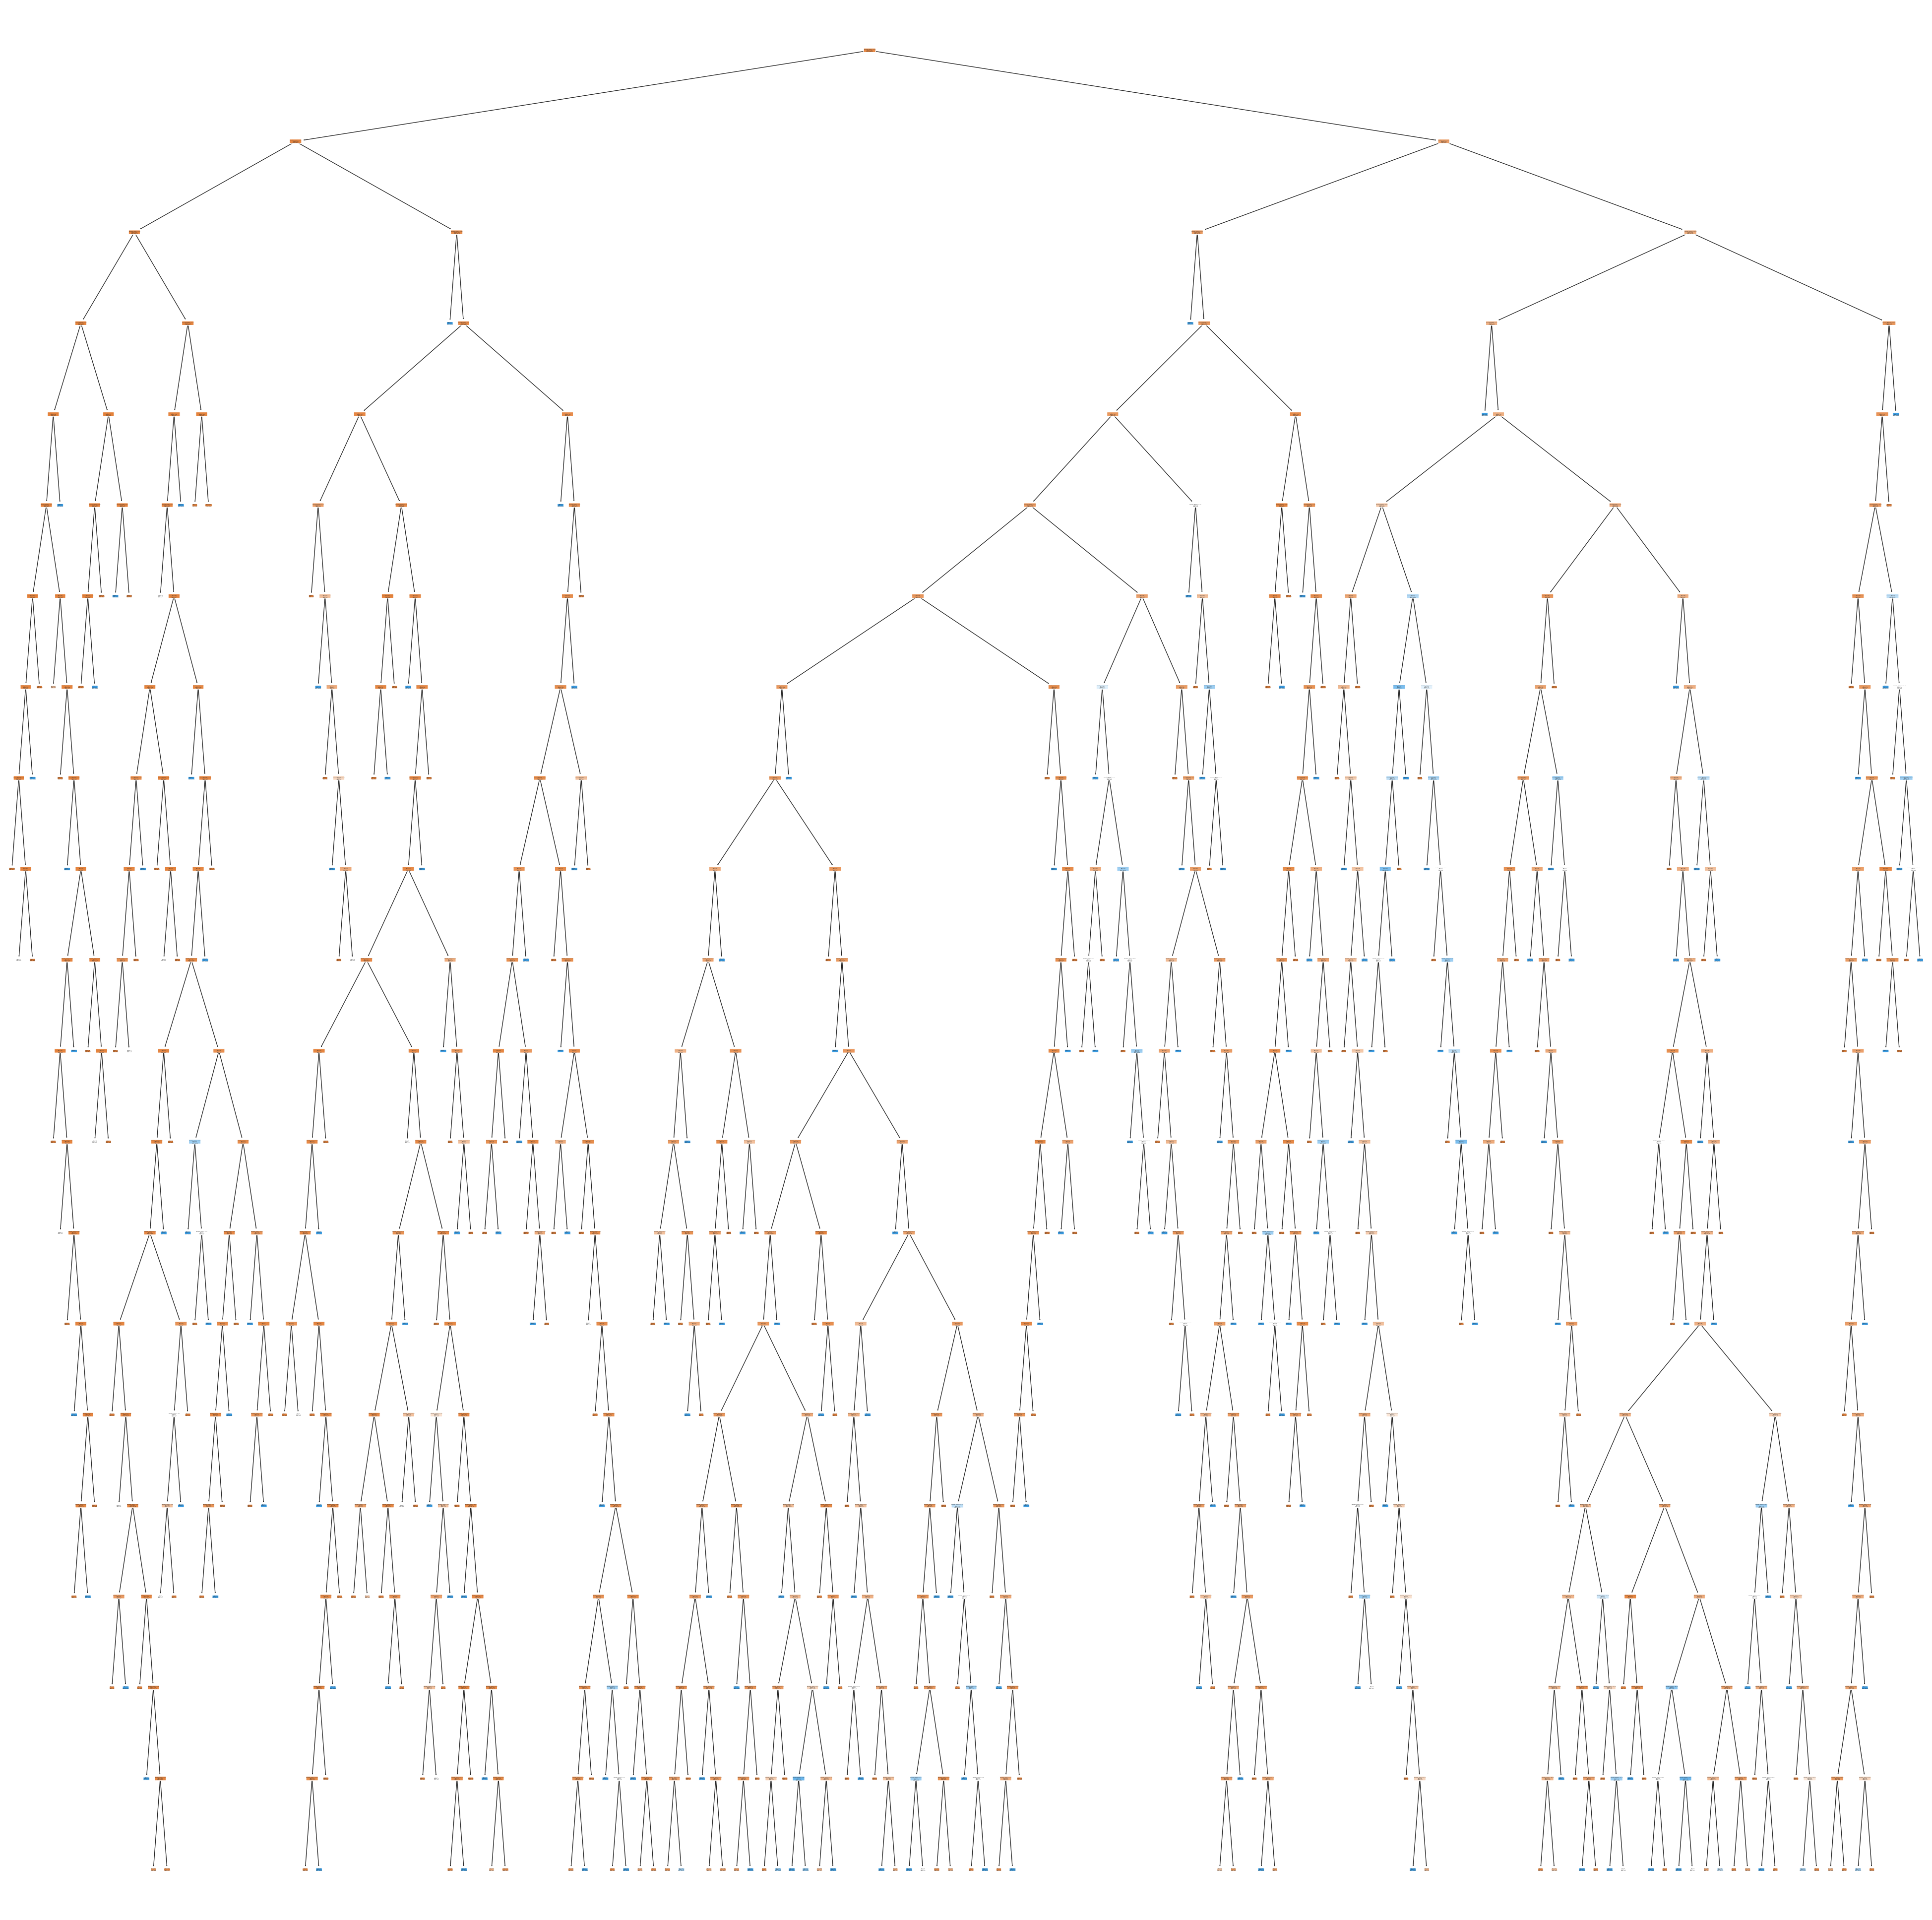

In [29]:
f = plt.figure(figsize=(50,50))
plot_tree(dectree6, filled=True, rounded=True, class_names=["Won", "Not Won"], feature_names=["percentage_revenue"])

# This did not go that well

Trying multiple x-variables for a model

In [ ]:
multiVar = pd.DataFrame(movieDB[['runtime', 'casts_popularity_sum', 'crews_popularity_sum', 'vote_average']])
multiVar2 = pd.DataFrame(movieDB[['runtime', 'casts_popularity_sum', 'crews_popularity_sum', 'vote_average', 'percentage_revenue']])
multi = pd.DataFrame(movieDB[['runtime','vote_average','casts_popularity_sum','crews_popularity_sum','release_date']])

In [ ]:
# Splitting the dataset into the Training set and Test set

won_train5, won_test5, multiVar_train, multiVar_test = train_test_split(won, multiVar, test_size = 0.2, random_state=50)
print("Multi Var Set")
print("Train Set :", won_train5.shape, multiVar_train.shape)
print("Test Set  :", won_test5.shape, multiVar_test.shape)

# Splitting the dataset into the Training set and Test set
won_train7, won_test7, multiVar2_train, multiVar2_test = train_test_split(won, multiVar2, test_size = 0.2, random_state=50)
print("Multi Var Set 2")
print("Train Set :", won_train7.shape, multiVar2_train.shape)
print("Test Set  :", won_test7.shape, multiVar2_test.shape)

multi_train,multi_test,won_train8,won_test8=train_test_split(multi,won,test_size=0.2,random_state=50)

In [ ]:
dtree=DecisionTreeClassifier(max_depth=20,random_state=50)
dtree.fit(multi_train,won_train8)
multi_train_pred=dtree.predict(multi_train)
multi_test_pred = dtree.predict(multi_test)
f, axes=plt.subplots(1,2,figsize=(15,5))
sb.heatmap(confusion_matrix(won_train8,multi_train_pred),annot=True,fmt='d',ax=axes[0])
sb.heatmap(confusion_matrix(won_test8,multi_test_pred),annot=True,fmt="d",ax=axes[1])

In [ ]:
# Decision Tree for multiVar
dectree5 = DecisionTreeClassifier(max_depth = 20, random_state=50)
dectree5.fit(multiVar_train, won_train5)

# Predicting the Test set results
multiVar_train_pred = dectree5.predict(multiVar_train)
multiVar_test_pred = dectree5.predict(multiVar_test)

# Confusion Matrix for Train and Test Set
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sb.heatmap(confusion_matrix(won_train5, multiVar_train_pred), annot = True, fmt = "d", ax = ax[0])
sb.heatmap(confusion_matrix(won_test5, multiVar_test_pred), annot = True, fmt = "d", ax = ax[1])

### Does not look really good on the test set.

In [ ]:
# Printing decision Tree
f = plt.figure(figsize=(50,50))
plot_tree(dectree5, filled = True, rounded = True, class_names = ["Won", "Not Won"], feature_names = ["runtime", "casts_popularity_sum", "crews_popularity_sum", "vote_average"])

In [ ]:
# Decision Tree for multiVar2
dectree6 = DecisionTreeClassifier(max_depth = 20, random_state=50)
dectree6.fit(multiVar2_train, won_train7)

# Predicting the Test set results
multiVar2_train_pred = dectree6.predict(multiVar2_train)
multiVar2_test_pred = dectree6.predict(multiVar2_test)

# Confusion Matrix for Train and Test Set
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sb.heatmap(confusion_matrix(won_train7, multiVar2_train_pred), annot = True, fmt = "d", ax = ax[0])
sb.heatmap(confusion_matrix(won_test7, multiVar2_test_pred), annot = True, fmt = "d", ax = ax[1])

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Fitting Random Forest Classification to the Training set

# Based on runtime
rfc = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rfc.fit(runtime_train, won_train)

# Predicting the Test set results
runtime_rfc_train_pred = rfc.predict(runtime_train)
runtime_rfc_test_pred = rfc.predict(runtime_test)

# Confusion Matrix for Train and Test Set
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sb.heatmap(confusion_matrix(won_train, runtime_rfc_train_pred), annot = True, fmt = "d", ax = ax[0])
sb.heatmap(confusion_matrix(won_test, runtime_rfc_test_pred), annot = True, fmt = "d", ax = ax[1])


In [ ]:
# Based on castSum
rfc2 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rfc2.fit(castSum_train, won_train2)

# Predicting the Test set results
castSum_rfc_train_pred = rfc2.predict(castSum_train)
castSum_rfc_test_pred = rfc2.predict(castSum_test)

# Confusion Matrix for Train and Test Set
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sb.heatmap(confusion_matrix(won_train2, castSum_rfc_train_pred), annot = True, fmt = "d", ax = ax[0])
sb.heatmap(confusion_matrix(won_test2, castSum_rfc_test_pred), annot = True, fmt = "d", ax = ax[1])

In [ ]:
# Based on crewSum
rfc3 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rfc3.fit(crewSum_train, won_train3)

# Predicting the Test set results
crewSum_rfc_train_pred = rfc3.predict(crewSum_train)
crewSum_rfc_test_pred = rfc3.predict(crewSum_test)

# Confusion Matrix for Train and Test Set
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sb.heatmap(confusion_matrix(won_train3, crewSum_rfc_train_pred), annot = True, fmt = "d", ax = ax[0])
sb.heatmap(confusion_matrix(won_test3, crewSum_rfc_test_pred), annot = True, fmt = "d", ax = ax[1])

In [ ]:
# Based on voteAvg
rfc4 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rfc4.fit(voteAvg_train, won_train4)

# Predicting the Test set results
voteAvg_rfc_train_pred = rfc4.predict(voteAvg_train)
voteAvg_rfc_test_pred = rfc4.predict(voteAvg_test)

# Confusion Matrix for Train and Test Set
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sb.heatmap(confusion_matrix(won_train4, voteAvg_rfc_train_pred), annot = True, fmt = "d", ax = ax[0])
sb.heatmap(confusion_matrix(won_test4, voteAvg_rfc_test_pred), annot = True, fmt = "d", ax = ax[1])

In [ ]:
# Based on multiVar
rfc5 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rfc5.fit(multiVar_train, won_train5)

# Predicting the Test set results
multiVar_rfc_train_pred = rfc5.predict(multiVar_train)
multiVar_rfc_test_pred = rfc5.predict(multiVar_test)

# Confusion Matrix for Train and Test Set
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sb.heatmap(confusion_matrix(won_train5, multiVar_rfc_train_pred), annot = True, fmt = "d", ax = ax[0])
sb.heatmap(confusion_matrix(won_test5, multiVar_rfc_test_pred), annot = True, fmt = "d", ax = ax[1])

# Okay randomForest wasn't much better

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

# Fitting K-NN to the Training set

# Based on runtime
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
knn.fit(runtime_train, won_train)

# Predicting the Test set results
runtime_knn_train_pred = knn.predict(runtime_train)
runtime_knn_test_pred = knn.predict(runtime_test)

# Confusion Matrix for Train and Test Set
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sb.heatmap(confusion_matrix(won_train, runtime_knn_train_pred), annot = True, fmt = "d", ax = ax[0])
sb.heatmap(confusion_matrix(won_test, runtime_knn_test_pred), annot = True, fmt = "d", ax = ax[1])

In [ ]:
# Based on castSum
knn2 = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
knn2.fit(castSum_train, won_train2)

# Predicting the Test set results
castSum_knn_train_pred = knn2.predict(castSum_train)
castSum_knn_test_pred = knn2.predict(castSum_test)

# Confusion Matrix for Train and Test Set
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sb.heatmap(confusion_matrix(won_train2, castSum_knn_train_pred), annot = True, fmt = "d", ax = ax[0])
sb.heatmap(confusion_matrix(won_test2, castSum_knn_test_pred), annot = True, fmt = "d", ax = ax[1])

In [ ]:
# Based on crewSum
knn3 = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
knn3.fit(crewSum_train, won_train3)

# Predicting the Test set results
crewSum_knn_train_pred = knn3.predict(crewSum_train)
crewSum_knn_test_pred = knn3.predict(crewSum_test)

# Confusion Matrix for Train and Test Set
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sb.heatmap(confusion_matrix(won_train3, crewSum_knn_train_pred), annot = True, fmt = "d", ax = ax[0])
sb.heatmap(confusion_matrix(won_test3, crewSum_knn_test_pred), annot = True, fmt = "d", ax = ax[1])

In [ ]:
# Based on voteAvg
knn4 = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
knn4.fit(voteAvg_train, won_train4)

# Predicting the Test set results
voteAvg_knn_train_pred = knn4.predict(voteAvg_train)
voteAvg_knn_test_pred = knn4.predict(voteAvg_test)

# Confusion Matrix for Train and Test Set
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sb.heatmap(confusion_matrix(won_train4, voteAvg_knn_train_pred), annot = True, fmt = "d", ax = ax[0])
sb.heatmap(confusion_matrix(won_test4, voteAvg_knn_test_pred), annot = True, fmt = "d", ax = ax[1])

In [ ]:
# Based on multiVar
knn5 = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 5)
knn5.fit(multiVar_train, won_train5)

# Predicting the Test set results
multiVar_knn_train_pred = knn5.predict(multiVar_train)
multiVar_knn_test_pred = knn5.predict(multiVar_test)

# Confusion Matrix for Train and Test Set
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sb.heatmap(confusion_matrix(won_train5, multiVar_knn_train_pred), annot = True, fmt = "d", ax = ax[0])
sb.heatmap(confusion_matrix(won_test5, multiVar_knn_test_pred), annot = True, fmt = "d", ax = ax[1])

In [ ]:
knn6 = KNeighborsClassifier(n_neighbors = 3,metric = 'minkowski', p = 5)
knn6.fit(multi_train,won_train8)
multi_knn_train_pred = knn6.predict(multi_train)
multi_knn_test_pred = knn6.predict(multi_test)
f, axes=plt.subplots(1,2,figsize=(15,5))
sb.heatmap(confusion_matrix(won_train8,multi_knn_train_pred),annot=True,fmt="d",ax=axes[0])
sb.heatmap(confusion_matrix(won_test8,multi_knn_test_pred),annot=True,fmt="d",ax=axes[1])



# KNN did not work very well either

In [ ]:
# Trying Logistic Regression
from sklearn.linear_model import LogisticRegression

# Fitting Logistic Regression to the Training set

# Based on mutliVar
lr = LogisticRegression(random_state = 0)
lr.fit(multiVar_train, won_train5)

# Predicting the Test set results
multiVar_lr_train_pred = lr.predict(multiVar_train)
multiVar_lr_test_pred = lr.predict(multiVar_test)

# Confusion Matrix for Train and Test Set
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sb.heatmap(confusion_matrix(won_train5, multiVar_lr_train_pred), annot = True, fmt = "d", ax = ax[0])
sb.heatmap(confusion_matrix(won_test5, multiVar_lr_test_pred), annot = True, fmt = "d", ax = ax[1])

In [ ]:
# Trying SVM
from sklearn.svm import SVC

# Fitting SVM to the Training set

# Based on mutliVar
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(multiVar_train, won_train5)

# Predicting the Test set results
multiVar_svc_train_pred = svc.predict(multiVar_train)
multiVar_svc_test_pred = svc.predict(multiVar_test)

# Confusion Matrix for Train and Test Set
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sb.heatmap(confusion_matrix(won_train5, multiVar_svc_train_pred), annot = True, fmt = "d", ax = ax[0])
sb.heatmap(confusion_matrix(won_test5, multiVar_svc_test_pred), annot = True, fmt = "d", ax = ax[1])

# Ran on google collab it was useless

In [ ]:
# Trying Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Fitting Naive Bayes to the Training set

# Based on mutliVar
nb = GaussianNB()
nb.fit(multiVar_train, won_train5)

# Predicting the Test set results
multiVar_nb_train_pred = nb.predict(multiVar_train)
multiVar_nb_test_pred = nb.predict(multiVar_test)

# Confusion Matrix for Train and Test Set
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sb.heatmap(confusion_matrix(won_train5, multiVar_nb_train_pred), annot = True, fmt = "d", ax = ax[0])
sb.heatmap(confusion_matrix(won_test5, multiVar_nb_test_pred), annot = True, fmt = "d", ax = ax[1])

I think it is time for us to focus on a smaller scope. Possibly use the latest 30 years of movies and oscars